# Colab Setup

In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [ ]:
%cd "/content/gdrive/MyDrive/HackerRank ML/Annual Base Salary Percentile Estimation/"

/content/gdrive/MyDrive/HackerRank ML/Annual Base Salary Percentile Estimation


In [ ]:
!pwd

/content/gdrive/MyDrive/HackerRank ML/Annual Base Salary Percentile Estimation


# Setup

In [ ]:
# imports

# numerical operations
import numpy as np
import pandas as pd

# plotting
from matplotlib import pyplot as plt
import seaborn as sns

# utility
import os

In [ ]:
# load data

df_train = pd.read_csv(os.path.join("problem", "train.csv"))
df_train

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,"Arts, Entertainment, and Recreation",Supervisors of Transportation and Material Mov...,32350.0,40200.0,50790.0,62560.0,78520.0
1,US,"Mining, Quarrying, and Oil and Gas Extraction","Sales Representatives, Wholesale and Manufactu...",47860.0,61600.0,87810.0,107460.0,153600.0
2,US,Finance and Insurance,Physical Scientists,59240.0,63050.0,89740.0,126320.0,149070.0
3,US,Administrative and Support and Waste Managemen...,"Architects, Surveyors, and Cartographers",37320.0,47630.0,60550.0,77450.0,98990.0
4,US,Manufacturing,Supervisors of Protective Service Workers,50130.0,63840.0,81770.0,104530.0,133180.0
...,...,...,...,...,...,...,...,...
2292,NJ,Cross-industry,Legal Occupations,47950.0,73720.0,101550.0,163990.0,NaN
2293,NY,Cross-industry,Legal Occupations,47580.0,75920.0,126220.0,NaN,NaN
2294,RI,Cross-industry,Legal Occupations,46400.0,60560.0,98070.0,161120.0,NaN
2295,TX,Cross-industry,Legal Occupations,37540.0,51260.0,80850.0,135490.0,NaN


# Data Understanding and Analysis

In [ ]:
# let's check the different states in data
df_train["PRIM_STATE"].value_counts()

US    1498
FL      20
WV      19
DC      19
WA      19
SD      18
CO      18
NM      18
ME      18
NC      18
NH      18
DE      18
MI      18
AR      17
KY      17
GA      17
CA      17
MA      17
MN      17
ND      17
MO      17
UT      17
TX      16
AL      16
AZ      16
IL      16
ID      16
LA      16
MT      16
NJ      15
NV      15
NY      15
MS      15
OH      15
MD      15
HI      15
WI      14
IA      14
IN      14
TN      14
RI      14
VT      13
OK      13
CT      13
VA      13
SC      13
WY      13
PA      13
KS      13
AK      12
NE      12
OR      10
Name: PRIM_STATE, dtype: int64

In [ ]:
# all the states are two character words
# the distribution of states data is not that imbalanced, except when it represents the whole nation

In [ ]:
# what about NAICS_TITLE?

df_train["NAICS_TITLE"].value_counts()

Cross-industry                                                                                                                         885
Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)     86
Other Services (except Public Administration)                                                                                           85
Health Care and Social Assistance                                                                                                       84
Management of Companies and Enterprises                                                                                                 84
Educational Services                                                                                                                    79
Administrative and Support and Waste Management and Remediation Services                                                                79
Manufacturing              

In [ ]:
# there's surely some imbalance in data of NAICS_TITLE
# however, as we see, these long names do not have any overlaps

# for ex: we do not have entertainment in more than 1 NAICS_TITLE
# so those "comma"s and "and"s does not matter

In [ ]:
# what about OCC_TITLE?

df_train["OCC_TITLE"].value_counts()

Legal Occupations                                                           57
Management Occupations                                                      57
Sales and Related Occupations                                               56
Life, Physical, and Social Science Occupations                              56
Office and Administrative Support Occupations                               55
                                                                            ..
Rail Transportation Workers                                                  7
Preschool, Elementary, Middle, Secondary, and Special Education Teachers     6
Postsecondary Teachers                                                       6
Funeral Service Workers                                                      5
Law Enforcement Workers                                                      3
Name: OCC_TITLE, Length: 116, dtype: int64

In [ ]:
# data in OCC_TITLE is highly unbalanced
# we do not see any overlapping occupations here

In [ ]:
# how is NAICS_TITLE important if we have OCC_TITLE?
# because OCC_TITLE is highly specific to the job

# let's analyze Cross-industry NAICS_TITLE first

df_train[df_train["NAICS_TITLE"] == "Cross-industry"]["OCC_TITLE"].value_counts()

Management Occupations                              42
Office and Administrative Support Occupations       40
Food Preparation and Serving Related Occupations    40
Architecture and Engineering Occupations            40
Protective Service Occupations                      40
                                                    ..
Life, Physical, and Social Science Technicians       1
Business Operations Specialists                      1
Grounds Maintenance Workers                          1
Tour and Travel Guides                               1
Air Transportation Workers                           1
Name: OCC_TITLE, Length: 92, dtype: int64

In [ ]:
# see.. NAICS_TITLE will prove to be helpful to tackle this inbalance in data
# for ex: we do not have much data for "Air Transportation Workers"
# however, we know it belongs to "Cross-industry" sector
# so based on that, we could get an overall idea of salary range for it

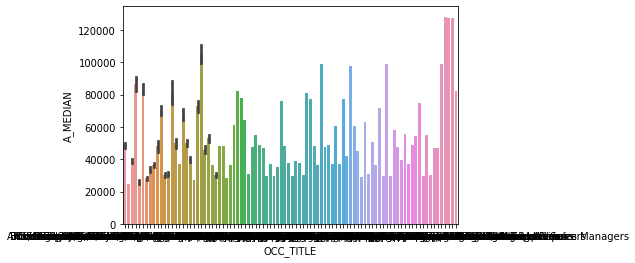

In [ ]:
# let's check the distribution of salary median for this sector

df_cross_industry = df_train[df_train["NAICS_TITLE"] == "Cross-industry"]
sns.barplot(data=df_cross_industry, x="OCC_TITLE", y="A_MEDIAN")

In [ ]:
# as we see a minimum value of 20000 is satisfied by all
# let's see stats as graphs would be hard to visualize for too much data

df_cross_industry.describe()

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
count,885.000000,885.000000,885.000000,882.000000,847.000000
mean,31762.960452,40095.005650,53241.468927,71343.287982,89526.269185
std,10508.141997,16006.723097,24187.837102,34058.364013,40078.537930
min,17080.000000,17620.000000,18860.000000,23780.000000,29740.000000
25%,23380.000000,29040.000000,36090.000000,46692.500000,60025.000000
50%,29200.000000,36410.000000,47370.000000,61150.000000,78450.000000
75%,37340.000000,48360.000000,64650.000000,95420.000000,121700.000000
max,80480.000000,122510.000000,170690.000000,200770.000000,206960.000000


In [ ]:
# see.. we get a min max bound
# this could help to predict for "Air Transportation Workers" as we do not have much data about it
# let's check if something similar is the case

df_cross_industry[df_cross_industry["OCC_TITLE"]=="Air Transportation Workers"]

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
2164,US,Cross-industry,Air Transportation Workers,39450.0,60520.0,82170.0,158870.0,NaN


In [ ]:
# all the values are post 75% of the sector
# atleast this pattern would help us get a little accuracy as compared to random prediction
# that means the sector feature is important

In [ ]:
# all the three features are important
# now let's check if there are patterns within these columns itself

In [ ]:
# for PRIM_STATE

df_state = df_train.groupby(["PRIM_STATE"]).agg(
              avg_10=("A_PCT10", "mean"),
              med_10=("A_PCT10", "median"),
              avg_25=("A_PCT25", "mean"),
              med_25=("A_PCT25", "median"),
              avg_50=("A_MEDIAN", "mean"),
              med_50=("A_MEDIAN", "median"),
              avg_75=("A_PCT75", "mean"),
              med_75=("A_PCT75", "median"),
              avg_90=("A_PCT90", "mean"),
              med_90=("A_PCT90", "median"),
          )
df_state

,avg_10,med_10,avg_25,med_25,avg_50,med_50,avg_75,med_75,avg_90,med_90
PRIM_STATE,,,,,,,,,,
AK,36665.833333,37540.0,46935.000000,47660.0,63078.333333,61770.0,83341.666667,79910.0,110769.166667,101870.0
AL,29546.875000,27820.0,37513.750000,33245.0,49845.625000,42060.0,68768.750000,59640.0,89927.500000,70925.0
AR,27882.941176,23710.0,34021.176471,29720.0,44990.000000,37650.0,60521.176471,48060.0,83147.058824,62940.0
AZ,32472.500000,29345.0,38340.625000,33770.0,50604.375000,47250.0,66711.875000,60330.0,91445.625000,76825.0
CA,38533.529412,33470.0,47632.941176,38890.0,65309.411765,58690.0,91274.117647,78820.0,104690.666667,100510.0
CO,35481.111111,30515.0,43912.222222,38345.0,57287.777778,49700.0,77589.444444,63275.0,88734.375000,80030.0
CT,38418.461538,30810.0,49321.538462,39420.0,66716.153846,60970.0,89805.384615,77640.0,98720.909091,97760.0
DC,43837.368421,37070.0,57544.736842,47630.0,76042.631579,62080.0,93373.888889,79945.0,116310.588235,101780.0
DE,34504.444444,29220.0,44625.555556,37660.0,59930.555556,48420.0,82852.222222,65140.0,92374.375000,86670.0


In [ ]:
# sort by avg_10 to see if what pattern exists
df_state.sort_values(by=["avg_10"], axis=0, inplace=True)
df_state

,avg_10,med_10,avg_25,med_25,avg_50,med_50,avg_75,med_75,avg_90,med_90
PRIM_STATE,,,,,,,,,,
MS,24181.333333,22620.0,29730.000000,28500.0,39377.333333,36560.0,52886.666667,46910.0,69038.000000,60040.0
WV,24291.052632,22700.0,30406.842105,29010.0,39687.894737,37370.0,52370.000000,48370.0,70353.684211,61330.0
LA,24390.000000,22545.0,31810.625000,28980.0,42896.875000,41520.0,56589.375000,57330.0,73841.250000,69500.0
KY,25817.058824,23550.0,32526.470588,29180.0,42372.941176,36760.0,57501.764706,47310.0,75114.117647,60460.0
OK,26142.307692,22940.0,34382.307692,29460.0,44356.153846,38370.0,62181.538462,52040.0,84596.153846,75880.0
SC,26443.846154,23270.0,32753.846154,30020.0,42322.307692,38550.0,57157.692308,49390.0,77083.076923,63340.0
ID,27056.250000,23730.0,34826.250000,30385.0,47637.500000,45640.0,62361.250000,54940.0,81894.375000,69405.0
NV,27257.333333,23950.0,35178.666667,29910.0,46008.000000,38980.0,61444.666667,61190.0,82489.333333,78550.0
MO,27749.411765,24910.0,35072.941176,30160.0,46052.352941,41510.0,60885.294118,49630.0,82365.882353,76750.0


In [ ]:
# check if the values are monotonously increasing from top to bottom
# if yes, it would mean that there's a strong pattern between states
# also, we are checking between states, then the row for state "US" must not be considered as it is nation-wide data

df_state.drop("US", inplace=True)

In [ ]:
(df_state.diff(1)*100) / df_state

,avg_10,med_10,avg_25,med_25,avg_50,med_50,avg_75,med_75,avg_90,med_90
PRIM_STATE,,,,,,,,,,
MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WV,0.451686,0.352423,2.225953,1.758014,0.782509,2.167514,-0.986570,3.018400,1.870100,2.103375
LA,0.405688,-0.687514,4.412937,-0.103520,7.480685,9.995183,7.456126,15.628816,4.723059,11.755396
KY,5.527581,4.267516,2.200809,0.685401,-1.236482,-12.948857,1.586716,-21.179455,1.694578,-14.952034
OK,1.244148,-2.659111,5.397651,0.950441,4.471111,4.195986,7.525986,9.089162,11.208590,20.321560
SC,1.140297,1.418135,-4.971818,1.865423,-4.805613,0.466926,-8.789449,-5.365459,-9.746727,-19.797916
ID,2.263447,1.938475,5.950695,1.201251,11.157580,15.534619,8.344216,10.101929,5.875004,8.738564
NV,0.737722,0.918580,1.001791,-1.588098,-3.541775,-17.085685,-1.491722,10.214087,0.721255,11.642266
MO,1.773293,3.853874,-0.301445,0.828912,0.096310,6.094917,-0.918732,-23.292363,-0.149881,-2.345277


In [ ]:
# there are certain states which do not follow the monotously increasing pattern
# accuracy with those states might be low, in the case where sector and occuption are too not having a strong correlation

# list of those states
df_check_monotonous_pattern = (df_state.diff(1)*100) / df_state

# set 5% threshold as such smaller drops might happen when being affected by external factors
((df_check_monotonous_pattern < 0) & (abs(df_check_monotonous_pattern) > 5)).any(axis=1)

PRIM_STATE
MS    False
WV    False
LA    False
KY     True
OK    False
SC     True
ID    False
NV     True
MO     True
UT    False
AR     True
GA    False
KS     True
IA     True
FL    False
IN     True
MT     True
NC     True
WY    False
OH     True
AL     True
TN     True
TX     True
WI     True
NM    False
PA     True
VT     True
MI     True
VA     True
SD     True
ND    False
AZ     True
IL     True
MN     True
NE     True
DE     True
NH     True
ME     True
HI    False
CO     True
OR    False
NJ     True
AK    False
NY     True
RI     True
MD    False
CT     True
CA    False
MA     True
WA    False
DC    False
dtype: bool

In [ ]:
# arghh.. there's no such monotonous pattern
# still, we could use these columns as the state's feature vectors
# we would also cluster the states but that might be useless now as we already have the state itself and some derived features of it
# todo: incorporate df_state as a feature vector for state when boosting accuracy
# todo: also have such feature vectors for sector

In [ ]:
# now, let's see how different occupations from the same sector related to each other
# is there some pattern within?

# both the below services seem to be a good choice for such analysis, as we have more datapoints to derive conclusions
# 1. Health Care and Social Assistance
# 2. Management of Companies and Enterprises

In [ ]:
# for health care
df_health_care = df_train[df_train['NAICS_TITLE'] == "Health Care and Social Assistance"]
df_health_care

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
6,US,Health Care and Social Assistance,Life Scientists,49500.0,62800.0,81690.0,125540.0,153130.0
11,US,Health Care and Social Assistance,"Counselors, Social Workers, and Other Communit...",29370.0,36750.0,46290.0,59770.0,76920.0
36,US,Health Care and Social Assistance,Other Personal Care and Service Workers,20260.0,23130.0,28870.0,31680.0,37980.0
42,US,Health Care and Social Assistance,Other Office and Administrative Support Workers,24060.0,29650.0,37050.0,46570.0,50190.0
121,US,Health Care and Social Assistance,Communications Equipment Operators,26160.0,29450.0,36220.0,38550.0,51350.0
...,...,...,...,...,...,...,...,...
2241,US,Health Care and Social Assistance,Top Executives,42370.0,60680.0,94550.0,131300.0,NaN
2242,US,Health Care and Social Assistance,Physical Scientists,29890.0,62260.0,159120.0,NaN,NaN
2243,US,Health Care and Social Assistance,Legal Occupations,38220.0,48910.0,75080.0,133210.0,NaN
2244,US,Health Care and Social Assistance,"Lawyers, Judges, and Related Workers",48310.0,63640.0,117910.0,190690.0,NaN


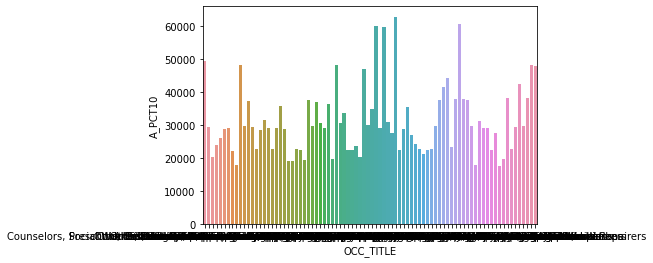

In [ ]:
sns.barplot(data=df_health_care, x="OCC_TITLE", y="A_PCT10")

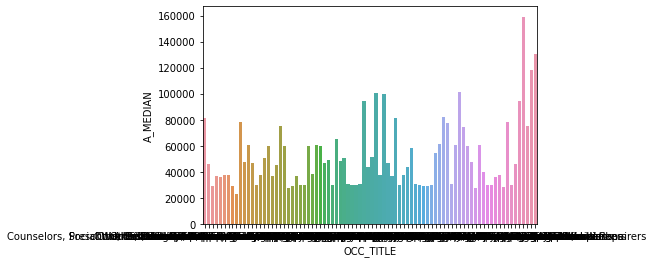

In [ ]:
# it defines a bare minimum for all the jobs in the sector
# let's check for other target variables as well

sns.barplot(data=df_health_care, x="OCC_TITLE", y="A_MEDIAN")

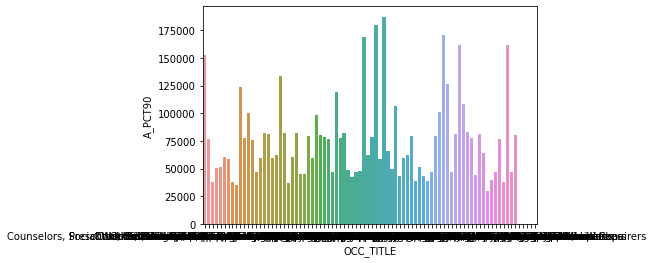

In [ ]:
# todo: we could also have feature vectors for occupation as well as it seems that clustering is possible somehow

sns.barplot(data=df_health_care, x="OCC_TITLE", y="A_PCT90")

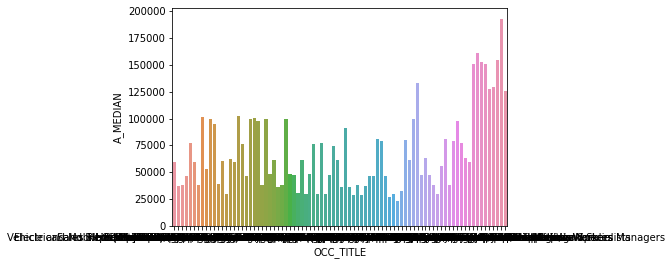

In [ ]:
# repeating the same for management
df_health_care = df_train[df_train['NAICS_TITLE'] == "Management of Companies and Enterprises"]

sns.barplot(data=df_health_care, x="OCC_TITLE", y="A_MEDIAN")

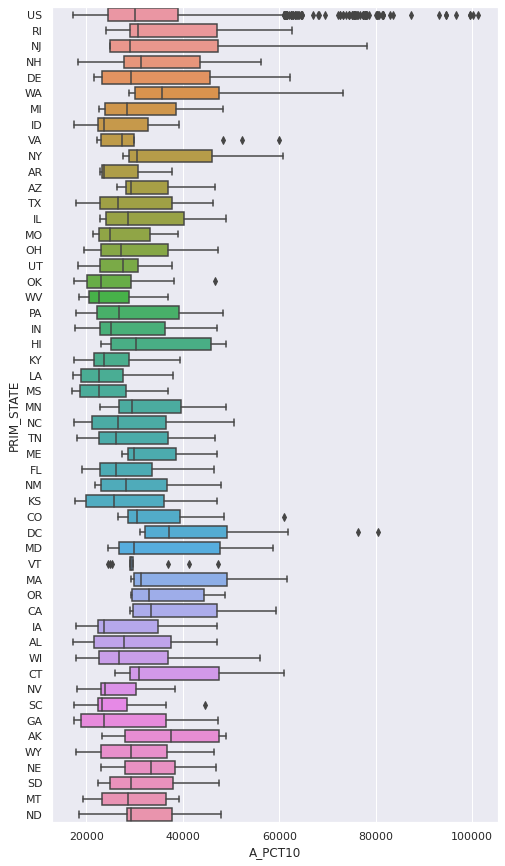

In [ ]:
# let's visualize the target variables now and check for outliers

# enlarge plot as needed
sns.set(rc={'figure.figsize':(8,15)})

sns.boxplot(data=df_train, x="A_PCT10", y="PRIM_STATE")

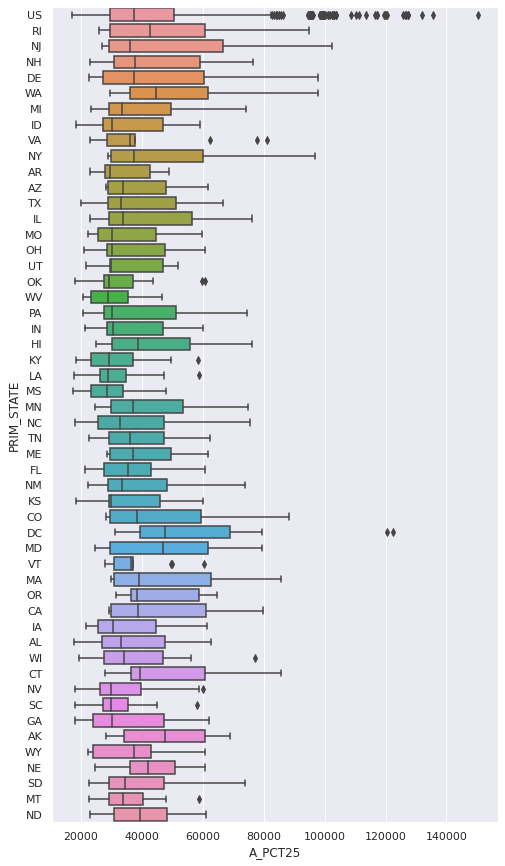

In [ ]:
# box plot identifies many more outliers in the US state
# obiovusly, coz it is having country wide data so that's possible
# but what's wrong with the states "VT", "VA" and "DC"?

# let's check the same for other target variables first

sns.boxplot(data=df_train, x="A_PCT25", y="PRIM_STATE")

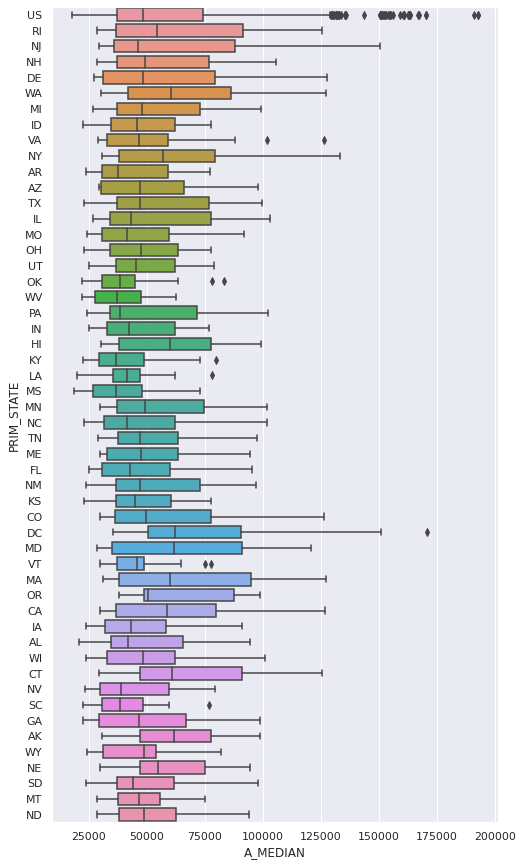

In [ ]:
# same issues in the same states, although a few new states might be added to the list
# let's continue checks

sns.boxplot(data=df_train, x="A_MEDIAN", y="PRIM_STATE")

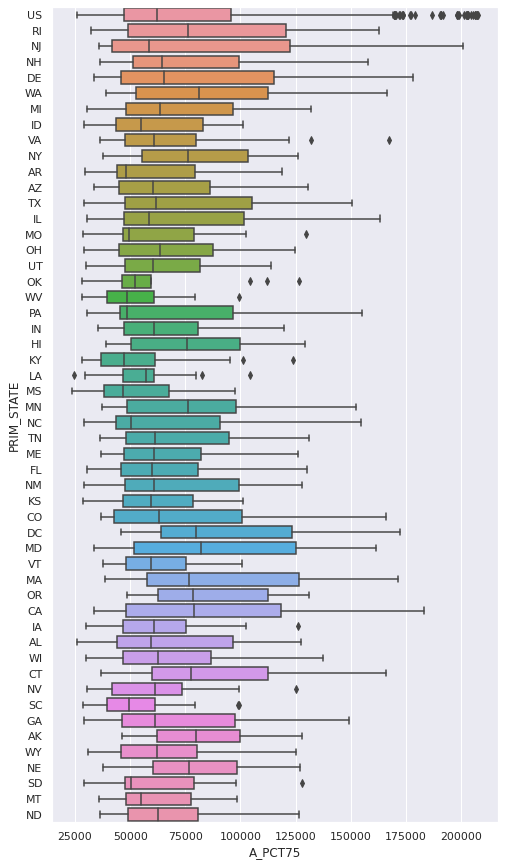

In [ ]:
sns.boxplot(data=df_train, x="A_PCT75", y="PRIM_STATE")

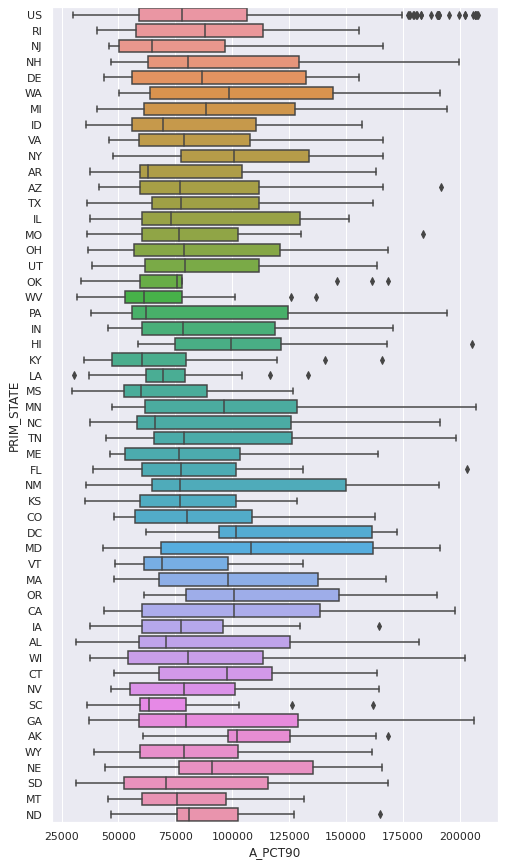

In [ ]:
sns.boxplot(data=df_train, x="A_PCT90", y="PRIM_STATE")

In [ ]:
# seems like OK and KY should be added to the list
# final list of states that may contain outlier data: US (to be neglected), VA, VT, OK, KY

In [ ]:
# what's wrong? are these jobs very unique or highly common?
# let's check

possible_outlier_states = ["VA", "VT", "OK", "KY"]
for state in possible_outlier_states:
  df_temp = df_train[df_train["PRIM_STATE"] == state]
  q1 = df_temp["A_MEDIAN"].quantile(0.25)
  q3 = df_temp["A_MEDIAN"].quantile(0.75)
  iqr = q3 - q1
  upper_limit = q3 + iqr
  print("Possible outlier data for", state)
  print(df_temp[df_temp["A_MEDIAN"] > upper_limit])

Possible outlier data for VA
     PRIM_STATE     NAICS_TITLE                                 OCC_TITLE  \
45           VA  Cross-industry  Architecture and Engineering Occupations   
222          VA  Cross-industry     Computer and Mathematical Occupations   
2282         VA  Cross-industry                    Management Occupations   

      A_PCT10  A_PCT25  A_MEDIAN   A_PCT75   A_PCT90  
45    48280.0  62570.0   88230.0  122000.0  161040.0  
222   52320.0  77910.0  101680.0  131780.0  166160.0  
2282  60010.0  81080.0  126340.0  167440.0       NaN  
Possible outlier data for VT
     PRIM_STATE     NAICS_TITLE  \
700          VT  Cross-industry   
1009         VT  Cross-industry   
1331         VT  Cross-industry   

                                              OCC_TITLE  A_PCT10  A_PCT25  \
700               Computer and Mathematical Occupations  47370.0  60360.0   
1009  Healthcare Practitioners and Technical Occupat...  36910.0  49610.0   
1331      Business and Financial Operatio

In [ ]:
# as we see, most of them belong to one of these:
# 1. Computer and Mathematical Occupations
# 2. Business and Financial Operations Occupations
# 3. Architecture and Engineering Occupations
# 4. Management Occupations

# there might be two more cases here, where we should not consider them as outliers
# either these jobs have less supply of qualified workforce in these states
# or these jobs are highly paid in other states as well, and there is sufficient data of these jobs for these states

In [ ]:
# but let's check something that I doubt first..
df_train[df_train["OCC_TITLE"] == "Computer and Mathematical Occupations"]["NAICS_TITLE"].value_counts()

Cross-industry                                                                                                                         38
Accommodation and Food Services                                                                                                         1
Manufacturing                                                                                                                           1
Administrative and Support and Waste Management and Remediation Services                                                                1
Agriculture, Forestry, Fishing and Hunting                                                                                              1
Professional, Scientific, and Technical Services                                                                                        1
Management of Companies and Enterprises                                                                                                 1
Educational Services              

In [ ]:
# gotcha! At first, I thought that an occupation can belong to only one sector, but it's not the case
# all the possibler outlier data printed above belongs to the "Cross-industry" category which makes me strongly believe that those points are not outliers
# note: so, we cannot remove the cross-industry value by marking all other industries as 1 after one hot encoding
# note: the same would apply to the US value in state column

In [ ]:
# let's focus on the supply issue for now

possible_outlier_states = ["VA", "VT", "OK", "KY"]
for state in possible_outlier_states:
  df_temp = df_train[df_train["PRIM_STATE"] == state]
  q1 = df_temp["A_MEDIAN"].quantile(0.25)
  q3 = df_temp["A_MEDIAN"].quantile(0.75)
  iqr = q3 - q1
  upper_limit = q3 + iqr
  df_possible_outlier_temp = df_temp[df_temp["A_MEDIAN"] > upper_limit]

  for idx, row in df_possible_outlier_temp.iterrows():
    total_job_in_the_city = len(df_temp[df_temp["OCC_TITLE"] == row["OCC_TITLE"]])
    print("Total", total_job_in_the_city, "entry for", row["OCC_TITLE"], "in the state", row["PRIM_STATE"], "found")

Total 1 entry for Architecture and Engineering Occupations in the state VA found
Total 1 entry for Computer and Mathematical Occupations in the state VA found
Total 1 entry for Management Occupations in the state VA found
Total 1 entry for Computer and Mathematical Occupations in the state VT found
Total 1 entry for Healthcare Practitioners and Technical Occupations in the state VT found
Total 1 entry for Business and Financial Operations Occupations in the state VT found
Total 1 entry for Legal Occupations in the state OK found
Total 1 entry for Management Occupations in the state OK found
Total 1 entry for Architecture and Engineering Occupations in the state OK found
Total 1 entry for Management Occupations in the state KY found
Total 1 entry for Architecture and Engineering Occupations in the state KY found


In [ ]:
# as we see, there wasn't enough data to justify them as outliers
# let's check if these values are justified in US

# for Architecture and Engineering Occupations
# copying values from above output cells for easy comparision
# 48280.0  62570.0   88230.0  122000.0  161040.0
# 46640.0  60710.0   78270.0  104120.0  146040.0
# 39120.0  49800.0   73060.0   95300.0  119770.0

df_train[df_train["OCC_TITLE"] == "Architecture and Engineering Occupations"].describe()

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,46874.905660,61700.188679,82856.037736,107740.000000,135721.320755
std,7180.395485,8721.098090,9806.637732,14284.896408,17436.748334
min,36440.000000,46690.000000,70360.000000,80020.000000,98690.000000
25%,39270.000000,58770.000000,76980.000000,99310.000000,126780.000000
50%,47210.000000,60710.000000,78230.000000,101120.000000,129310.000000
75%,48660.000000,62570.000000,91210.000000,122000.000000,151140.000000
max,61790.000000,79570.000000,114050.000000,150070.000000,172490.000000


In [ ]:
# we clearly see that these data points are justified by the data of occupation
# hence, I do not see any outliers in data
# note: nothing to be removed by marking it as dirty

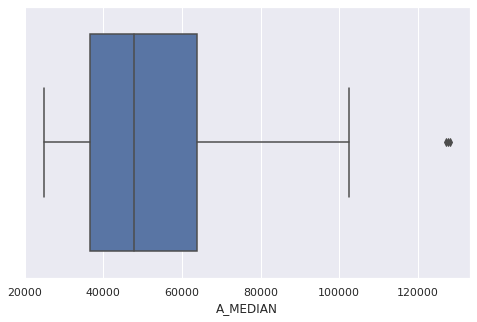

In [ ]:
# let's simply visualize Us for cross sector
sns.set(rc={'figure.figsize':(8,5)})
df_temp = df_train[(df_train["PRIM_STATE"] == "US") & (df_train["NAICS_TITLE"] == "Cross-industry")]
sns.boxplot(data=df_temp, x="A_MEDIAN")

In [ ]:
# see.. doesn't seem like too many outliers

# Feature Engineering



In [ ]:
# let's check for and handle nans first

df_train.isna().any()

PRIM_STATE     False
NAICS_TITLE    False
OCC_TITLE      False
A_PCT10        False
A_PCT25        False
A_MEDIAN       False
A_PCT75         True
A_PCT90         True
dtype: bool

In [ ]:
(df_train.isna().sum()*100) / len(df_train)

PRIM_STATE     0.000000
NAICS_TITLE    0.000000
OCC_TITLE      0.000000
A_PCT10        0.000000
A_PCT25        0.000000
A_MEDIAN       0.000000
A_PCT75        1.306051
A_PCT90        6.051371
dtype: float64

In [ ]:
# around 6-7% of data is nans
# the first thought would be to drop them
# but let's think statistically if we should drop them

# (this part is obvious, but I am just making a statistical note for the reader)
# we have three categorical columns that create a unique combination when combined
# so the total combinations possible in the dataaset can be
total_permutations = len(df_train["PRIM_STATE"].unique()) * len(df_train["NAICS_TITLE"].unique()) * len(df_train["OCC_TITLE"].unique())

# the above is not the correct way.. as I am not considering domain knowledge here. A few occupations can never belong to an industry. And a few industries can't exist in a few states.

# and we just have a % of it
(len(df_train)*100) / total_permutations

1.8133447012757358

In [ ]:
# as we see, our data already lacks a lot of information
# we just have 1.81% of total information
# let's not focus on dropping nans

# there's a way to fill it
# we could use mean/median values of the state or of the industry
# or we could simply fill in the values from US and Cross-industry (as they are anyway generic and covering everything)
# or, this is the most interesting, we could find some pattern between the state and US, the industry and cross-industry and then fill in values considering this pattern

# the last method seems most interesting and efficient
# it would also help us gain some understanding of data
# but what if it's wrong? we will still gain some new understanding of data

In [ ]:
# let's look at some rows containing nan

df_nans = df_train[df_train.isna().any(axis=1)]
df_nans

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
2158,US,Cross-industry,Management Occupations,47860.0,74710.0,102450.0,160960.0,NaN
2159,US,Cross-industry,Top Executives,41260.0,60900.0,98720.0,160540.0,NaN
2160,US,Cross-industry,"Advertising, Marketing, Promotions, Public Rel...",63270.0,95140.0,128160.0,177360.0,NaN
2161,US,Cross-industry,Operations Specialties Managers,73230.0,95660.0,127140.0,165860.0,NaN
2162,US,Cross-industry,Legal Occupations,38620.0,58400.0,82430.0,156900.0,NaN
...,...,...,...,...,...,...,...,...
2292,NJ,Cross-industry,Legal Occupations,47950.0,73720.0,101550.0,163990.0,NaN
2293,NY,Cross-industry,Legal Occupations,47580.0,75920.0,126220.0,NaN,NaN
2294,RI,Cross-industry,Legal Occupations,46400.0,60560.0,98070.0,161120.0,NaN
2295,TX,Cross-industry,Legal Occupations,37540.0,51260.0,80850.0,135490.0,NaN


In [ ]:
df_nans["PRIM_STATE"].value_counts()

US    108
NJ      3
RI      2
CO      2
CT      2
DE      2
DC      2
IL      2
MA      2
CA      2
NY      2
TX      2
WA      1
VA      1
NH      1
PA      1
NC      1
MD      1
GA      1
FL      1
Name: PRIM_STATE, dtype: int64

In [ ]:
df_nans["NAICS_TITLE"].value_counts()

Cross-industry                                                                                                                         38
Finance and Insurance                                                                                                                  12
Mining, Quarrying, and Oil and Gas Extraction                                                                                          10
Wholesale Trade                                                                                                                         9
Management of Companies and Enterprises                                                                                                 9
Information                                                                                                                             8
Professional, Scientific, and Technical Services                                                                                        7
Manufacturing                     

In [ ]:
df_nans["OCC_TITLE"].value_counts()

Legal Occupations                                                           29
Management Occupations                                                      27
Lawyers, Judges, and Related Workers                                        18
Top Executives                                                              13
Advertising, Marketing, Promotions, Public Relations, and Sales Managers    13
Operations Specialties Managers                                             12
Other Management Occupations                                                 7
Air Transportation Workers                                                   6
Physical Scientists                                                          3
Life Scientists                                                              2
Healthcare Diagnosing or Treating Practitioners                              2
Engineers                                                                    1
Supervisors of Sales Workers                        

In [ ]:
# let's just get one row to deduce some logic for filling nans

df_nan_sample = df_nans.iloc[0]
df_nan_sample

PRIM_STATE                         US
NAICS_TITLE            Cross-industry
OCC_TITLE      Management Occupations
A_PCT10                       47860.0
A_PCT25                       74710.0
A_MEDIAN                     102450.0
A_PCT75                      160960.0
A_PCT90                           NaN
Name: 2158, dtype: object

In [ ]:
# do we have any other data for this occupation?

df_occ_management = df_train[df_train["OCC_TITLE"] == "Management Occupations"]
df_occ_management.shape

(57, 8)

In [ ]:
# lots of
# let's check it's distribution

# values from above are bluntly copied here for easy comparision
# A_PCT10                       47860.0
# A_PCT25                       74710.0
# A_MEDIAN                     102450.0
# A_PCT75                      160960.0
# A_PCT90                           NaN


df_occ_management.describe()

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
count,57.000000,57.0000,57.000000,55.000000,30.000000
mean,52491.929825,74620.0000,106666.315789,145855.272727,176391.666667
std,12307.439306,17443.3439,22855.329922,27200.731666,19336.184961
min,32760.000000,46480.0000,59700.000000,77940.000000,116630.000000
25%,46400.000000,60900.0000,94530.000000,126690.000000,164797.500000
50%,48250.000000,74460.0000,99340.000000,137630.000000,168360.000000
75%,60900.000000,85720.0000,126340.000000,165245.000000,190495.000000
max,80480.000000,122510.0000,160540.000000,206950.000000,207490.000000


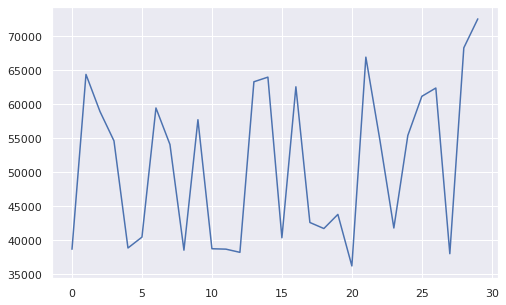

In [ ]:
# there doesn't seem like any pattern in here
# let's try with a new idea
# if we get the distribution of the difference between PCT90 and PCT75, for the values that we have, then we might be able to find something useful

df_diff_90_75 = df_occ_management["A_PCT90"] - df_occ_management["A_PCT75"]
df_diff_90_75.reset_index(drop=True).plot()

In [ ]:
# its completely random, seems like we can add up the mean value
# but I doubt this strategy, so I think that we must
# todo: have two datasets.. one with dropped nans and other with filled nans using this strategy

((df_diff_90_75*100) / df_occ_management["A_PCT75"]).describe()

count    30.000000
mean     41.239514
std       9.586883
min      28.906624
25%      31.568683
50%      42.360394
75%      49.495289
max      59.150389
dtype: float64

In [ ]:
# check if all the 90s are too nan where 75s are nan
df_train[df_train["A_PCT75"].isna()]["A_PCT90"].sum()

0.0

In [ ]:
df_train_filled = df_train.copy()

# we shouldn't fill values with huge uncertainity.. so if the standard deviation is too high, we do not fill with the mean, and drop instead
idxs_to_drop = []

for occ_title, group in df_train_filled[df_train_filled["A_PCT75"].isna()].groupby(["OCC_TITLE"]):
  df_occ = df_train[df_train["OCC_TITLE"] == occ_title]
  if len(group) < len(df_occ):
    df_diff_75_50 = df_occ["A_PCT75"] - df_occ["A_MEDIAN"]
    df_diff_75_50_per = (df_diff_75_50*100) / df_occ["A_MEDIAN"]

    if (df_diff_75_50_per.mean() / 2.5) >= df_diff_75_50_per.std():
      df_train_filled.loc[group.index, "A_PCT75"] = df_train_filled.loc[group.index, "A_MEDIAN"] + df_diff_75_50.mean()

      
      
    else:
      idxs_to_drop.extend(group.index)
  else:
      idxs_to_drop.extend(group.index)

In [ ]:
df_train_filled.isna().sum(), df_train.isna().sum(), len(idxs_to_drop)

(PRIM_STATE       0
 NAICS_TITLE      0
 OCC_TITLE        0
 A_PCT10          0
 A_PCT25          0
 A_MEDIAN         0
 A_PCT75          2
 A_PCT90        139
 dtype: int64, PRIM_STATE       0
 NAICS_TITLE      0
 OCC_TITLE        0
 A_PCT10          0
 A_PCT25          0
 A_MEDIAN         0
 A_PCT75         30
 A_PCT90        139
 dtype: int64, 2)

In [ ]:
# let's repeat the same for PCT90

for occ_title, group in df_train_filled[df_train_filled["A_PCT90"].isna()].groupby(["OCC_TITLE"]):
  df_occ = df_train[df_train["OCC_TITLE"] == occ_title]
  if len(group) < len(df_occ):
    df_diff_90_75 = df_occ["A_PCT90"] - df_occ["A_PCT75"]
    df_diff_90_75_per = (df_diff_90_75*100) / df_occ["A_PCT75"]

    if (df_diff_90_75_per.mean() / 2.5) >= df_diff_90_75_per.std():
      df_train_filled.loc[group.index, "A_PCT90"] = df_train_filled.loc[group.index, "A_PCT75"] + df_diff_90_75.mean()
      
    else:
      idxs_to_drop.extend(group.index)
  else:
      idxs_to_drop.extend(group.index)

In [ ]:
df_train_filled.isna().sum(), df_train.isna().sum(), len(idxs_to_drop)

(PRIM_STATE      0
 NAICS_TITLE     0
 OCC_TITLE       0
 A_PCT10         0
 A_PCT25         0
 A_MEDIAN        0
 A_PCT75         2
 A_PCT90        36
 dtype: int64, PRIM_STATE       0
 NAICS_TITLE      0
 OCC_TITLE        0
 A_PCT10          0
 A_PCT25          0
 A_MEDIAN         0
 A_PCT75         30
 A_PCT90        139
 dtype: int64, 37)

In [ ]:
# let's save the new data for future

df_train_filled.drop(list(set(idxs_to_drop)), inplace=True)
df_train_filled.isna().sum()

PRIM_STATE     0
NAICS_TITLE    0
OCC_TITLE      0
A_PCT10        0
A_PCT25        0
A_MEDIAN       0
A_PCT75        0
A_PCT90        0
dtype: int64

In [ ]:
df_train_filled.shape

(2261, 8)

In [ ]:
df_train_filled.to_csv("train_fillna.csv")

# Train a Baseline

In [ ]:
# let's start by training a random forest
# we will have to encode the categorical features
# using on-hot encoding

df_dummies = pd.get_dummies(df_train_filled[["PRIM_STATE", "NAICS_TITLE", "OCC_TITLE"]], drop_first=True)
df_dummies

,PRIM_STATE_AL,PRIM_STATE_AR,PRIM_STATE_AZ,PRIM_STATE_CA,PRIM_STATE_CO,PRIM_STATE_CT,PRIM_STATE_DC,PRIM_STATE_DE,PRIM_STATE_FL,PRIM_STATE_GA,...,OCC_TITLE_Supervisors of Protective Service Workers,OCC_TITLE_Supervisors of Sales Workers,OCC_TITLE_Supervisors of Transportation and Material Moving Workers,"OCC_TITLE_Textile, Apparel, and Furnishings Workers",OCC_TITLE_Top Executives,OCC_TITLE_Tour and Travel Guides,OCC_TITLE_Transportation and Material Moving Occupations,"OCC_TITLE_Vehicle and Mobile Equipment Mechanics, Installers, and Repairers",OCC_TITLE_Water Transportation Workers,OCC_TITLE_Woodworkers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_x = df_dummies.copy()
df_y = df_train_filled[[col for col in df_train_filled.columns if "A_" in col]]
df_y

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,32350.0,40200.0,50790.0,62560.0,78520.000000
1,47860.0,61600.0,87810.0,107460.0,153600.000000
2,59240.0,63050.0,89740.0,126320.0,149070.000000
3,37320.0,47630.0,60550.0,77450.0,98990.000000
4,50130.0,63840.0,81770.0,104530.0,133180.000000
...,...,...,...,...,...
2291,49430.0,63500.0,104280.0,171230.0,223628.571429
2292,47950.0,73720.0,101550.0,163990.0,216388.571429
2293,47580.0,75920.0,126220.0,178048.0,230446.571429
2294,46400.0,60560.0,98070.0,161120.0,213518.571429


In [ ]:
# let's just ignore the pattern in target columns for now and train a random forest
# we have to have a train-test split
# however, there's not distribution in the X (features) to have a strategic split
# except the pattern that which occupations go with which industry
# also, we cannot have any ideal test set in our case
# so we will go with k-fold methology to training

In [ ]:
# imports

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

In [ ]:
def normalized_absolute_error(true, pred):
    return abs(pred - true) / true

def mean_normalized_weighted_absolute_error(y_true, y_pred):
  # the shape of ys must be (batch_size, 5) as we have 5 targets  
  # todo: incorporate the order of predected precentiles and return 0 if the order is not followed
  
  # weighted error calcluation
  l10 = 0.1*normalized_absolute_error(y_true[:, 0], y_pred[:, 0])
  l25 = 0.2*normalized_absolute_error(y_true[:, 1], y_pred[:, 1])
  l50 = 0.4*normalized_absolute_error(y_true[:, 2], y_pred[:, 2])
  l75 = 0.2*normalized_absolute_error(y_true[:, 3], y_pred[:, 3])
  l90 = 0.1*normalized_absolute_error(y_true[:, 4], y_pred[:, 4])

  # return mean
  return (l10+l25+l50+l75+l90).mean()

In [ ]:
# create scikit learn score function
score_mnwae = make_scorer(mean_normalized_weighted_absolute_error, greater_is_better=False)

In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators=100,
    criterion="poisson",
    max_depth=50,
    max_leaf_nodes=25,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)

poisson_scores = []
mnwae_scores = []

for (train, test) in cv.split(df_x, df_y["A_PCT10"]):
    rf_reg.fit(df_x.iloc[train].values, df_y.iloc[train].values)
    
    train_score = rf_reg.score(df_x.iloc[train].values, df_y.iloc[train].values)
    test_score = rf_reg.score(df_x.iloc[test].values, df_y.iloc[test].values)
    poisson_scores.append((train_score, test_score))

    y_pred = rf_reg.predict(df_x.iloc[train].values)
    train_score = mean_normalized_weighted_absolute_error(df_y.iloc[train].values, y_pred)
    
    y_pred = rf_reg.predict(df_x.iloc[test].values)
    test_score = mean_normalized_weighted_absolute_error(df_y.iloc[test].values, y_pred)

    mnwae_scores.append((train_score, test_score))


print(poisson_scores)
print(mnwae_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.5483549917502234, 0.49293483594852533), (0.537519827035126, 0.5036805604324146), (0.5571712972233451, 0.5091329688770532), (0.5453703358015574, 0.5451958275991886)]
[(0.2580741176688811, 0.2702603705657601), (0.25979003334400985, 0.28009891634765005), (0.2599878775300223, 0.25140929645031157), (0.2584637190142802, 0.2527976427766067)]


In [ ]:
# let's consider the distribution of A_MEDIAN for stratified split
rf_reg = RandomForestRegressor(
    n_estimators=100,
    criterion="poisson",
    max_depth=50,
    max_leaf_nodes=25,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mnwae_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg.fit(df_x.iloc[train].values, df_y.iloc[train].values)
    
    train_score = rf_reg.score(df_x.iloc[train].values, df_y.iloc[train].values)
    test_score = rf_reg.score(df_x.iloc[test].values, df_y.iloc[test].values)
    poisson_scores.append((train_score, test_score))

    y_pred = rf_reg.predict(df_x.iloc[train].values)
    train_score = mean_normalized_weighted_absolute_error(df_y.iloc[train].values, y_pred)
    
    y_pred = rf_reg.predict(df_x.iloc[test].values)
    test_score = mean_normalized_weighted_absolute_error(df_y.iloc[test].values, y_pred)

    mnwae_scores.append((train_score, test_score))

print(poisson_scores)
print(mnwae_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.5436252993520367, 0.4929498576296181), (0.5413453619482986, 0.5216144827090199), (0.5502718130644245, 0.5283791103735206), (0.5661937627145249, 0.5140749765862345)]
[(0.2616658846196906, 0.26556273942555714), (0.2596191238052348, 0.2643449780838807), (0.25615067284790527, 0.26183672399497765), (0.25373847235593705, 0.2571830100457859)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


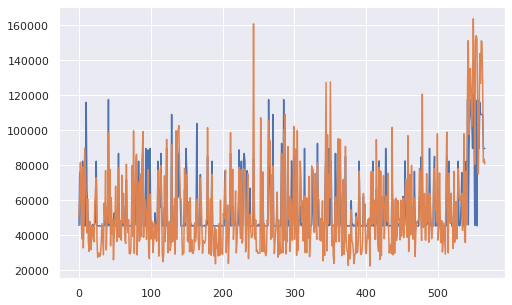

In [ ]:
# atleast we have some baseline now, let's visualize the output
y_pred = None
y_true = None

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):    
    y_pred = rf_reg.predict(df_x.iloc[test].values)
    y_true = df_y.iloc[test].values
    break

plt.plot(range(len(y_pred)), y_pred[:, 2])
plt.plot(range(len(y_true)), y_true[:, 2])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.5450432205477861, 0.47096585520649514), (0.5411605765217389, 0.5115442827036327), (0.5527081089456505, 0.5251753103102554), (0.560533254788675, 0.4948760281387513)]
[(0.2748764981680136, 0.2790828384252231), (0.2733527210471514, 0.27837182938445143), (0.2674776727835571, 0.2744109172386778), (0.2684914312692434, 0.2729816187747959)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


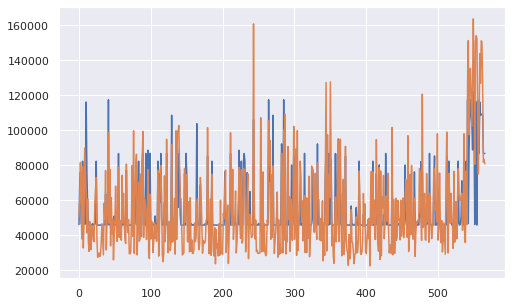

In [ ]:
# as we see, it's not performing that good
# which is expected as well
# what could a model learn from 0s and 1s?

# let's just train the model to predict MEDIAN instead of all targets and see what happens

# let's consider the distribution of A_MEDIAN for stratified split
rf_reg = RandomForestRegressor(
    n_estimators=100,
    criterion="poisson",
    max_depth=50,
    max_leaf_nodes=25,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg.fit(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    
    train_score = rf_reg.score(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    test_score = rf_reg.score(df_x.iloc[test].values, df_y.iloc[test]["A_MEDIAN"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_MEDIAN"].values, y_pred)
    
    y_pred = rf_reg.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_MEDIAN"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
  y_pred = rf_reg.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_MEDIAN"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

# Training a DNN

In [ ]:
# imports

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
# at first, let's train a DNN with one hot vectors itself
# later, we will see how to use feature vectors
# i do not think DNNs could perform better with such one hot encoded features, but let's see
# also, we will have to scale our target values this time

# let's have a look at the target variables
df_y.head()

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,32350.0,40200.0,50790.0,62560.0,78520.0
1,47860.0,61600.0,87810.0,107460.0,153600.0
2,59240.0,63050.0,89740.0,126320.0,149070.0
3,37320.0,47630.0,60550.0,77450.0,98990.0
4,50130.0,63840.0,81770.0,104530.0,133180.0


In [ ]:
# one way of reducing this values is by having a normalized difference as we know the order of targets
# for ex

(df_y.loc[0, "A_PCT25"] - df_y.loc[0, "A_PCT10"]) / df_y.loc[0, "A_PCT25"]

0.19527363184079602

In [ ]:
# another way is to use the PCT90 value as base

(df_y.loc[0, "A_PCT90"] - df_y.loc[0, "A_PCT10"]) / df_y.loc[0, "A_PCT90"]

0.5880030565461029

In [ ]:
# or we could simply use a scale

df_y.loc[0, "A_PCT10"] / df_y.loc[0, "A_PCT25"], df_y.loc[0, "A_PCT10"] / df_y.loc[0, "A_PCT90"]

(0.804726368159204, 0.4119969434538971)

In [ ]:
# the scaled values seem much better compared to normalized difference
# also, it ensures that the output will never be 0
# however, this scaling depends on one of target variable itself which should not be the case

# what if we simply use a min-max scaler on the whole dataset?
scaler = MinMaxScaler()

scaler.fit(df_y)
scaler.data_min_, scaler.data_max_

(array([17080., 17290., 17940., 23780., 29740.]),
 array([ 96740.        , 126630.        , 170690.        , 222518.        ,
        274916.57142857]))

In [ ]:
scaler.transform(df_y.loc[:0])

array([[0.19168968, 0.20952991, 0.21505728, 0.19513128, 0.19895865]])

In [ ]:
# this seems to work fine
# but here we have no way of incorporating the information that PCT10 will always be less than PCT25 and so on
# still, let's give it a try

In [ ]:
# re-write loss function for keras

def mean_normalized_absolute_error(true, pred):
    return tf.keras.backend.mean(abs(pred - true) / true)

def normalized_absolute_error(true, pred):
    return abs(pred - true) / true

def mean_normalized_weighted_absolute_error(y_true, y_pred):
  # the shape of ys must be (batch_size, 5) as we have 5 targets  
  # todo: incorporate the order of predected precentiles and return 0 if the order is not followed
  
  # weighted error calcluation
  l10 = 0.1*normalized_absolute_error(y_true[:, 0], y_pred[:, 0])
  l25 = 0.2*normalized_absolute_error(y_true[:, 1], y_pred[:, 1])
  l50 = 0.4*normalized_absolute_error(y_true[:, 2], y_pred[:, 2])
  l75 = 0.2*normalized_absolute_error(y_true[:, 3], y_pred[:, 3])
  l90 = 0.1*normalized_absolute_error(y_true[:, 4], y_pred[:, 4])

  # return mean
  return tf.keras.backend.mean(l10+l25+l50+l75+l90)

In [ ]:
def build_model():
  dnn = tf.keras.models.Sequential()
  dnn.add(tf.keras.layers.Input(shape=df_x.shape[1]))
  # dnn.add(tf.keras.layers.Dense(32, activation="relu"))
  # dnn.add(tf.keras.layers.Dense(16, activation="relu"))
  dnn.add(tf.keras.layers.Dense(5, activation="relu"))
  return dnn

In [ ]:
dnn = build_model()
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 935       
                                                                 
Total params: 935
Trainable params: 935
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn.compile(optimizer="adam", loss=mean_normalized_weighted_absolute_error, metrics="poisson")
dnn.fit(x=df_x.values, y=scaler.transform(df_y), batch_size=30, epochs=50)

Epoch 1/50
76/76 [==============================] - 1s 2ms/step - loss: nan - poisson: nan
Epoch 2/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 3/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 4/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 5/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 6/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 7/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 8/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 9/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 10/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: nan
Epoch 11/50
76/76 [==============================] - 0s 2ms/step - loss: nan - poisson: n

In [ ]:
# as we see, it doesn't work
# let's work on getting some features as input instead of one hot encoding

# remember this feature vector that we built above?
# for PRIM_STATE

df_state = df_train_filled.groupby(["PRIM_STATE"]).agg(
              avg_10=("A_PCT10", "mean"),
              med_10=("A_PCT10", "median"),
              avg_25=("A_PCT25", "mean"),
              med_25=("A_PCT25", "median"),
              avg_50=("A_MEDIAN", "mean"),
              med_50=("A_MEDIAN", "median"),
              avg_75=("A_PCT75", "mean"),
              med_75=("A_PCT75", "median"),
              avg_90=("A_PCT90", "mean"),
              med_90=("A_PCT90", "median"),
          )
df_state

,avg_10,med_10,avg_25,med_25,avg_50,med_50,avg_75,med_75,avg_90,med_90
PRIM_STATE,,,,,,,,,,
AK,36665.833333,37540.0,46935.000000,47660.0,63078.333333,61770.0,83341.666667,79910.0,110769.166667,101870.0
AL,29546.875000,27820.0,37513.750000,33245.0,49845.625000,42060.0,68768.750000,59640.0,89927.500000,70925.0
AR,27882.941176,23710.0,34021.176471,29720.0,44990.000000,37650.0,60521.176471,48060.0,83147.058824,62940.0
AZ,32472.500000,29345.0,38340.625000,33770.0,50604.375000,47250.0,66711.875000,60330.0,91445.625000,76825.0
CA,38533.529412,33470.0,47632.941176,38890.0,65309.411765,58690.0,91274.117647,78820.0,119579.915966,101590.0
CO,35481.111111,30515.0,43912.222222,38345.0,57287.777778,49700.0,77589.444444,63275.0,102401.587302,89230.0
CT,38418.461538,30810.0,49321.538462,39420.0,66716.153846,60970.0,89805.384615,77640.0,115902.197802,98720.0
DC,43837.368421,37070.0,57544.736842,47630.0,76042.631579,62080.0,100170.947368,80580.0,130311.924812,102320.0
DE,34504.444444,29220.0,44625.555556,37660.0,59930.555556,48420.0,82852.222222,65140.0,107062.142857,92305.0


In [ ]:
# let do the same for NAISC_TITLE and OCC_TITLE

df_naics = df_train_filled.groupby(["NAICS_TITLE"]).agg(
              avg_10=("A_PCT10", "mean"),
              med_10=("A_PCT10", "median"),
              avg_25=("A_PCT25", "mean"),
              med_25=("A_PCT25", "median"),
              avg_50=("A_MEDIAN", "mean"),
              med_50=("A_MEDIAN", "median"),
              avg_75=("A_PCT75", "mean"),
              med_75=("A_PCT75", "median"),
              avg_90=("A_PCT90", "mean"),
              med_90=("A_PCT90", "median"),
          )
df_naics

,avg_10,med_10,avg_25,med_25,avg_50,med_50,avg_75,med_75,avg_90,med_90
NAICS_TITLE,,,,,,,,,,
Accommodation and Food Services,27526.911765,24510.0,33211.176471,29380.0,42243.823529,37065.0,54557.941176,48095.0,72168.802521,61915.0
Administrative and Support and Waste Management and Remediation Services,31107.179487,28890.0,38699.102564,36380.0,51020.256410,46975.0,68641.153846,59895.0,91433.512821,77600.0
"Agriculture, Forestry, Fishing and Hunting",31768.541667,29290.0,39739.375000,36765.0,50206.250000,47165.0,66456.875000,59945.0,83994.666667,64630.0
"Arts, Entertainment, and Recreation",28605.466667,26200.0,35387.333333,30170.0,45758.000000,45110.0,59798.773333,59240.0,82454.887619,77480.0
Construction,34698.714286,31145.0,42693.571429,37710.0,54667.714286,47750.0,71405.142857,61715.0,90276.979592,78490.0
Cross-industry,31704.761905,29185.0,40001.337868,36390.0,53093.945578,47340.0,71467.097093,61150.0,94589.722296,79215.0
Educational Services,30559.871795,29420.0,38611.410256,37410.0,49316.794872,47420.0,62792.435897,60520.0,78713.956044,73015.0
"Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)",35448.352941,34440.0,45421.294118,43060.0,59419.529412,57280.0,76594.000000,73310.0,92334.000000,83130.0
Finance and Insurance,41987.121212,37795.0,51901.818182,46820.0,67828.484848,61245.0,90843.995655,77470.0,116377.330071,98730.0


In [ ]:
df_occ = df_train_filled.groupby(["OCC_TITLE"]).agg(
              avg_10=("A_PCT10", "mean"),
              med_10=("A_PCT10", "median"),
              avg_25=("A_PCT25", "mean"),
              med_25=("A_PCT25", "median"),
              avg_50=("A_MEDIAN", "mean"),
              med_50=("A_MEDIAN", "median"),
              avg_75=("A_PCT75", "mean"),
              med_75=("A_PCT75", "median"),
              avg_90=("A_PCT90", "mean"),
              med_90=("A_PCT90", "median"),
          )
df_occ

,avg_10,med_10,avg_25,med_25,avg_50,med_50,avg_75,med_75,avg_90,med_90
OCC_TITLE,,,,,,,,,,
"Advertising, Marketing, Promotions, Public Relations, and Sales Managers",68926.111111,65735.0,91717.777778,90465.0,125522.222222,123955.0,170322.847222,165520.0,226876.847222,222074.0
Agricultural Workers,24200.769231,23160.0,29056.153846,29120.0,33833.846154,33990.0,40860.769231,39100.0,53243.846154,47320.0
Air Transportation Workers,50332.857143,50120.0,69262.857143,73920.0,91860.000000,96910.0,121975.714286,133670.0,144804.285714,162690.0
Animal Care and Service Workers,29503.333333,22570.0,33334.444444,26960.0,37415.555556,29720.0,44164.444444,37990.0,51637.777778,48530.0
"Architects, Surveyors, and Cartographers",46695.714286,46405.0,59918.571429,57845.0,77689.285714,76600.0,95946.428571,97850.0,121911.428571,122980.0
...,...,...,...,...,...,...,...,...,...,...
Tour and Travel Guides,23614.545455,23550.0,27010.000000,27580.0,34129.090909,30100.0,48752.727273,38480.0,58210.000000,48560.0
Transportation and Material Moving Occupations,25069.056604,23610.0,29819.245283,29400.0,37288.301887,37010.0,48703.018868,47560.0,64465.094340,61090.0
"Vehicle and Mobile Equipment Mechanics, Installers, and Repairers",35258.750000,35310.0,43503.750000,43010.0,55452.500000,53895.0,69498.125000,67625.0,80275.625000,78865.0


In [ ]:
# let's create a new df_x first
# we need the new df_x to have all the samples from df_train
# while the feature columns must be replaced by the above newly generated columns

df_new = df_train_filled.copy()
df_new

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,US,"Arts, Entertainment, and Recreation",Supervisors of Transportation and Material Mov...,32350.0,40200.0,50790.0,62560.0,78520.000000
1,US,"Mining, Quarrying, and Oil and Gas Extraction","Sales Representatives, Wholesale and Manufactu...",47860.0,61600.0,87810.0,107460.0,153600.000000
2,US,Finance and Insurance,Physical Scientists,59240.0,63050.0,89740.0,126320.0,149070.000000
3,US,Administrative and Support and Waste Managemen...,"Architects, Surveyors, and Cartographers",37320.0,47630.0,60550.0,77450.0,98990.000000
4,US,Manufacturing,Supervisors of Protective Service Workers,50130.0,63840.0,81770.0,104530.0,133180.000000
...,...,...,...,...,...,...,...,...
2291,MA,Cross-industry,Legal Occupations,49430.0,63500.0,104280.0,171230.0,223628.571429
2292,NJ,Cross-industry,Legal Occupations,47950.0,73720.0,101550.0,163990.0,216388.571429
2293,NY,Cross-industry,Legal Occupations,47580.0,75920.0,126220.0,178048.0,230446.571429
2294,RI,Cross-industry,Legal Occupations,46400.0,60560.0,98070.0,161120.0,213518.571429


In [ ]:
df_state = df_state.add_prefix("state_")
df_naics = df_naics.add_prefix("naics_")
df_occ = df_occ.add_prefix("occ_")


df_new.loc[:, df_state.columns] = None
df_new.loc[:, df_naics.columns] = None
df_new.loc[:, df_occ.columns] = None
df_new.head()

,PRIM_STATE,NAICS_TITLE,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,state_avg_10,state_med_10,...,occ_avg_10,occ_med_10,occ_avg_25,occ_med_25,occ_avg_50,occ_med_50,occ_avg_75,occ_med_75,occ_avg_90,occ_med_90
0,US,"Arts, Entertainment, and Recreation",Supervisors of Transportation and Material Mov...,32350.0,40200.0,50790.0,62560.0,78520.0,None,None,...,None,None,None,None,None,None,None,None,None,None
1,US,"Mining, Quarrying, and Oil and Gas Extraction","Sales Representatives, Wholesale and Manufactu...",47860.0,61600.0,87810.0,107460.0,153600.0,None,None,...,None,None,None,None,None,None,None,None,None,None
2,US,Finance and Insurance,Physical Scientists,59240.0,63050.0,89740.0,126320.0,149070.0,None,None,...,None,None,None,None,None,None,None,None,None,None
3,US,Administrative and Support and Waste Managemen...,"Architects, Surveyors, and Cartographers",37320.0,47630.0,60550.0,77450.0,98990.0,None,None,...,None,None,None,None,None,None,None,None,None,None
4,US,Manufacturing,Supervisors of Protective Service Workers,50130.0,63840.0,81770.0,104530.0,133180.0,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# now, let's add these features into the dataframe
for state in df_state.index:
  df_new.loc[df_new["PRIM_STATE"] == state, [col for col in df_new.columns if "state_" in col]] = df_state.loc[state].tolist()

df_new.isna().any()  

PRIM_STATE      False
NAICS_TITLE     False
OCC_TITLE       False
A_PCT10         False
A_PCT25         False
A_MEDIAN        False
A_PCT75         False
A_PCT90         False
state_avg_10    False
state_med_10    False
state_avg_25    False
state_med_25    False
state_avg_50    False
state_med_50    False
state_avg_75    False
state_med_75    False
state_avg_90    False
state_med_90    False
naics_avg_10     True
naics_med_10     True
naics_avg_25     True
naics_med_25     True
naics_avg_50     True
naics_med_50     True
naics_avg_75     True
naics_med_75     True
naics_avg_90     True
naics_med_90     True
occ_avg_10       True
occ_med_10       True
occ_avg_25       True
occ_med_25       True
occ_avg_50       True
occ_med_50       True
occ_avg_75       True
occ_med_75       True
occ_avg_90       True
occ_med_90       True
dtype: bool

In [ ]:
for naics in df_naics.index:
  df_new.loc[df_new["NAICS_TITLE"] == naics, [col for col in df_new.columns if "naics_" in col]] = df_naics.loc[naics].tolist()

df_new.isna().any()

PRIM_STATE      False
NAICS_TITLE     False
OCC_TITLE       False
A_PCT10         False
A_PCT25         False
A_MEDIAN        False
A_PCT75         False
A_PCT90         False
state_avg_10    False
state_med_10    False
state_avg_25    False
state_med_25    False
state_avg_50    False
state_med_50    False
state_avg_75    False
state_med_75    False
state_avg_90    False
state_med_90    False
naics_avg_10    False
naics_med_10    False
naics_avg_25    False
naics_med_25    False
naics_avg_50    False
naics_med_50    False
naics_avg_75    False
naics_med_75    False
naics_avg_90    False
naics_med_90    False
occ_avg_10       True
occ_med_10       True
occ_avg_25       True
occ_med_25       True
occ_avg_50       True
occ_med_50       True
occ_avg_75       True
occ_med_75       True
occ_avg_90       True
occ_med_90       True
dtype: bool

In [ ]:
for occ in df_occ.index:
  df_new.loc[df_new["OCC_TITLE"] == occ, [col for col in df_new.columns if "occ_" in col]] = df_occ.loc[occ].tolist()

df_new.isna().any()

PRIM_STATE      False
NAICS_TITLE     False
OCC_TITLE       False
A_PCT10         False
A_PCT25         False
A_MEDIAN        False
A_PCT75         False
A_PCT90         False
state_avg_10    False
state_med_10    False
state_avg_25    False
state_med_25    False
state_avg_50    False
state_med_50    False
state_avg_75    False
state_med_75    False
state_avg_90    False
state_med_90    False
naics_avg_10    False
naics_med_10    False
naics_avg_25    False
naics_med_25    False
naics_avg_50    False
naics_med_50    False
naics_avg_75    False
naics_med_75    False
naics_avg_90    False
naics_med_90    False
occ_avg_10      False
occ_med_10      False
occ_avg_25      False
occ_med_25      False
occ_avg_50      False
occ_med_50      False
occ_avg_75      False
occ_med_75      False
occ_avg_90      False
occ_med_90      False
dtype: bool

In [ ]:
df_new.columns

Index(['PRIM_STATE', 'NAICS_TITLE', 'OCC_TITLE', 'A_PCT10', 'A_PCT25',
       'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'state_avg_10', 'state_med_10',
       'state_avg_25', 'state_med_25', 'state_avg_50', 'state_med_50',
       'state_avg_75', 'state_med_75', 'state_avg_90', 'state_med_90',
       'naics_avg_10', 'naics_med_10', 'naics_avg_25', 'naics_med_25',
       'naics_avg_50', 'naics_med_50', 'naics_avg_75', 'naics_med_75',
       'naics_avg_90', 'naics_med_90', 'occ_avg_10', 'occ_med_10',
       'occ_avg_25', 'occ_med_25', 'occ_avg_50', 'occ_med_50', 'occ_avg_75',
       'occ_med_75', 'occ_avg_90', 'occ_med_90'],
      dtype='object')

In [ ]:
# let's drop the raw features now

df_new.drop(columns=["PRIM_STATE", "NAICS_TITLE", "OCC_TITLE"], inplace=True)
df_new.columns

Index(['A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'state_avg_10',
       'state_med_10', 'state_avg_25', 'state_med_25', 'state_avg_50',
       'state_med_50', 'state_avg_75', 'state_med_75', 'state_avg_90',
       'state_med_90', 'naics_avg_10', 'naics_med_10', 'naics_avg_25',
       'naics_med_25', 'naics_avg_50', 'naics_med_50', 'naics_avg_75',
       'naics_med_75', 'naics_avg_90', 'naics_med_90', 'occ_avg_10',
       'occ_med_10', 'occ_avg_25', 'occ_med_25', 'occ_avg_50', 'occ_med_50',
       'occ_avg_75', 'occ_med_75', 'occ_avg_90', 'occ_med_90'],
      dtype='object')

In [ ]:
# now that everything is numeric, let's re-use min-max scaling and train a dummy model

scaler = MinMaxScaler()

scaler.fit(df_new)
scaler.data_min_, scaler.data_max_

(array([17080.        , 17290.        , 17940.        , 23780.        ,
        29740.        , 24181.33333333, 22545.        , 29730.        ,
        28500.        , 39377.33333333, 36560.        , 52370.        ,
        46910.        , 69038.        , 60040.        , 27526.91176471,
        24510.        , 33211.17647059, 29380.        , 42243.82352941,
        37065.        , 54557.94117647, 48095.        , 72168.80252101,
        61915.        , 18248.33333333, 18145.        , 21078.33333333,
        21165.        , 25250.        , 25570.        , 31039.16666667,
        29820.        , 39096.92307692, 37205.        ]),
 array([ 96740.        , 126630.        , 170690.        , 222518.        ,
        274916.57142857,  43837.36842105,  37540.        ,  57544.73684211,
         47660.        ,  76042.63157895,  62080.        , 100170.94736842,
         82150.        , 130311.92481203, 127740.        ,  53704.6       ,
         51065.        ,  68487.6       ,  69040.        ,  86

In [ ]:
# here's it is scaling for every column
# todo: also try minmaxscaler using global min, max values

df_new_scaled = scaler.transform(df_new)
df_new_scaled

array([[0.19168968, 0.20952991, 0.21505728, ..., 0.29566597, 0.25104041,
        0.24360493],
       [0.38639217, 0.40524968, 0.45741408, ..., 0.48900267, 0.45479999,
        0.50173366],
       [0.52924931, 0.41851107, 0.4700491 , ..., 0.5953703 , 0.56789155,
        0.60510415],
       ...,
       [0.38287723, 0.5362173 , 0.7088707 , ..., 0.74558304, 0.82411421,
        0.83288707],
       [0.36806427, 0.39573806, 0.52458265, ..., 0.74558304, 0.82411421,
        0.83288707],
       [0.25684158, 0.31068228, 0.41184943, ..., 0.74558304, 0.82411421,
        0.83288707]])

In [ ]:
# let's separate xs and ys

y = df_new_scaled[:, :5]
x = df_new_scaled[:, 5:]

x.shape, y.shape

((2261, 30), (2261, 5))

In [ ]:
# let's train the model for just median

def build_model():
  dnn = tf.keras.models.Sequential()
  dnn.add(tf.keras.layers.Input(shape=x.shape[1]))
  # dnn.add(tf.keras.layers.Dense(32, activation="tanh"))
  # dnn.add(tf.keras.layers.Dense(16, activation="tanh"))
  dnn.add(tf.keras.layers.Dense(1, activation="relu"))
  return dnn

In [ ]:
# for i in range(20):
#   dnn = build_model()
#   x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.10, shuffle=True)
#   dnn.compile(optimizer="adam", loss="mape", metrics=["mape", "poisson"])
#   history = dnn.fit(x=x_train, y=y_train[:, 2], validation_data=(x_valid, y_valid), epochs=50)
#   print(y_valid.mean(), y_valid.max(), y_valid.min())
#   print(history.history["loss"][-1], history.history["val_loss"][-1])

In [ ]:
# from the above training session, we see than values of 0 in y affect the model quite a lot
# so we literally need a different way to scale the data

# let's have a look at data again
df_new.head()

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,state_avg_10,state_med_10,state_avg_25,state_med_25,state_avg_50,...,occ_avg_10,occ_med_10,occ_avg_25,occ_med_25,occ_avg_50,occ_med_50,occ_avg_75,occ_med_75,occ_avg_90,occ_med_90
0,32350.0,40200.0,50790.0,62560.0,78520.0,34364.805195,29970.0,43129.254956,37520.0,56151.298701,...,36285.454545,32350.0,45121.818182,42180.0,57160.0,54830.0,70220.0,70820.0,86237.272727,82240.0
1,47860.0,61600.0,87810.0,107460.0,153600.0,34364.805195,29970.0,43129.254956,37520.0,56151.298701,...,34664.615385,35710.0,48884.615385,48750.0,67663.846154,63810.0,94386.153846,97630.0,124499.230769,129960.0
2,59240.0,63050.0,89740.0,126320.0,149070.0,34364.805195,29970.0,43129.254956,37520.0,56151.298701,...,46282.222222,48210.0,57490.0,62220.0,76468.888889,79440.0,110778.888889,112380.0,145735.555556,149070.0
3,37320.0,47630.0,60550.0,77450.0,98990.0,34364.805195,29970.0,43129.254956,37520.0,56151.298701,...,46695.714286,46405.0,59918.571429,57845.0,77689.285714,76600.0,95946.428571,97850.0,121911.428571,122980.0
4,50130.0,63840.0,81770.0,104530.0,133180.0,34364.805195,29970.0,43129.254956,37520.0,56151.298701,...,40860.0,41345.0,50875.714286,49305.0,67211.428571,70000.0,85207.142857,89115.0,106948.571429,109520.0


In [ ]:
# new way to scale the data
# scale using the minimal (my way)

df_new.min()

A_PCT10              17080.0
A_PCT25              17290.0
A_MEDIAN             17940.0
A_PCT75              23780.0
A_PCT90              29740.0
state_avg_10    24181.333333
state_med_10         22545.0
state_avg_25         29730.0
state_med_25         28500.0
state_avg_50    39377.333333
state_med_50         36560.0
state_avg_75         52370.0
state_med_75         46910.0
state_avg_90         69038.0
state_med_90         60040.0
naics_avg_10    27526.911765
naics_med_10         24510.0
naics_avg_25    33211.176471
naics_med_25         29380.0
naics_avg_50    42243.823529
naics_med_50         37065.0
naics_avg_75    54557.941176
naics_med_75         48095.0
naics_avg_90    72168.802521
naics_med_90         61915.0
occ_avg_10      18248.333333
occ_med_10           18145.0
occ_avg_25      21078.333333
occ_med_25           21165.0
occ_avg_50           25250.0
occ_med_50           25570.0
occ_avg_75      31039.166667
occ_med_75           29820.0
occ_avg_90      39096.923077
occ_med_90    

In [ ]:
df_new_scaled = df_new.copy()

df_new_scaled = df_new_scaled / df_new.min()
df_new_scaled = df_new_scaled.astype("float32")
df_new_scaled

,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,state_avg_10,state_med_10,state_avg_25,state_med_25,state_avg_50,...,occ_avg_10,occ_med_10,occ_avg_25,occ_med_25,occ_avg_50,occ_med_50,occ_avg_75,occ_med_75,occ_avg_90,occ_med_90
0,1.894028,2.325043,2.831104,2.630782,2.640215,1.421129,1.329341,1.450698,1.316491,1.425980,...,1.988426,1.782860,2.140673,1.992913,2.263762,2.144310,2.262303,2.374916,2.205730,2.210456
1,2.802108,3.562753,4.894649,4.518923,5.164761,1.421129,1.329341,1.450698,1.316491,1.425980,...,1.899604,1.968035,2.319188,2.303331,2.679756,2.495502,3.040873,3.273977,3.184374,3.493079
2,3.468384,3.646616,5.002230,5.312027,5.012441,1.421129,1.329341,1.450698,1.316491,1.425980,...,2.536244,2.656930,2.727445,2.939759,3.028471,3.106766,3.569003,3.768612,3.727545,4.006720
3,2.185012,2.754771,3.375139,3.256939,3.328514,1.421129,1.329341,1.450698,1.316491,1.425980,...,2.558903,2.557454,2.842662,2.733050,3.076803,2.995698,3.091141,3.281355,3.118185,3.305470
4,2.935012,3.692308,4.557971,4.395710,4.478144,1.421129,1.329341,1.450698,1.316491,1.425980,...,2.239109,2.278589,2.413650,2.329554,2.661839,2.737583,2.745149,2.988431,2.735473,2.943690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,2.894028,3.672643,5.812709,7.200589,7.519454,1.630134,1.390996,1.634416,1.374386,1.658568,...,2.410554,2.257371,2.823853,2.742736,3.549404,3.161908,4.557160,4.467136,4.958166,5.138556
2292,2.807377,4.263736,5.660535,6.896131,7.276011,1.482312,1.222444,1.552809,1.157895,1.542439,...,2.410554,2.257371,2.823853,2.742736,3.549404,3.161908,4.557160,4.467136,4.958166,5.138556
2293,2.785714,4.390977,7.035675,7.487300,7.748708,1.518527,1.355955,1.577666,1.321404,1.654370,...,2.410554,2.257371,2.823853,2.742736,3.549404,3.161908,4.557160,4.467136,4.958166,5.138556
2294,2.716628,3.502603,5.466555,6.775442,7.179508,1.543251,1.362608,1.605425,1.496667,1.606707,...,2.410554,2.257371,2.823853,2.742736,3.549404,3.161908,4.557160,4.467136,4.958166,5.138556


In [ ]:
df_new_scaled.max()

A_PCT10         5.663934
A_PCT25         7.323887
A_MEDIAN        9.514493
A_PCT75         9.357359
A_PCT90         9.244000
state_avg_10    1.812860
state_med_10    1.665114
state_avg_25    1.935578
state_med_25    1.672281
state_avg_50    1.931127
state_med_50    1.698031
state_avg_75    1.912754
state_med_75    1.751226
state_avg_90    1.887539
state_med_90    2.127582
naics_avg_10    1.950985
naics_med_10    2.083435
naics_avg_25    2.062185
naics_med_25    2.349898
naics_avg_50    2.052101
naics_med_50    2.378794
naics_avg_75    1.939186
naics_med_75    2.124649
naics_avg_90    1.751109
naics_med_90    2.042155
occ_avg_10      3.777118
occ_med_10      3.622761
occ_avg_25      4.351282
occ_med_25      4.497047
occ_avg_50      4.971177
occ_med_50      5.006258
occ_avg_75      5.487352
occ_med_75      5.650235
occ_avg_90      5.802934
occ_med_90      5.968929
dtype: float32

In [ ]:
# separate out features again as we are planning on a new model arch

state_cols = [col for col in df_new_scaled.columns if "state_" in col]
naics_cols = [col for col in df_new_scaled.columns if "naics_" in col]
occ_cols = [col for col in df_new_scaled.columns if "occ_" in col]

target_cols = [col for col in df_new_scaled.columns if "A_" in col]

df_y = df_new_scaled[target_cols]
df_state = df_new_scaled[state_cols]
df_naics = df_new_scaled[naics_cols]
df_occ = df_new_scaled[occ_cols]

df_occ.shape, df_naics.shape, df_state.shape, df_y.shape

((2261, 10), (2261, 10), (2261, 10), (2261, 5))

In [ ]:
# the network I want with three heads for three categorical variables

def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(4)(input_state)
  dense_naics = tf.keras.layers.Dense(4)(input_naics)
  dense_occ = tf.keras.layers.Dense(4)(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, activation="relu")(concat)
  out = tf.keras.layers.Dense(1, activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn

In [ ]:
dnn = build_model()
dnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 4)            44          ['input_2[0][0]']                
                                                                                              

In [ ]:
state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y, test_size=0.25, shuffle=True)
state_train.shape, naics_train.shape, occ_train.shape, state_valid.shape, naics_valid.shape, occ_valid.shape, y_train.shape, y_valid.shape

((1695, 10),
 (1695, 10),
 (1695, 10),
 (566, 10),
 (566, 10),
 (566, 10),
 (1695, 5),
 (566, 5))

In [ ]:
dnn.compile(optimizer="adam", loss="mape", metrics=["poisson"])
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                  validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                  epochs=200)

Epoch 1/200
53/53 [==============================] - 1s 6ms/step - loss: 100.0000 - poisson: 49.5942 - val_loss: 100.0000 - val_poisson: 49.1889
Epoch 2/200
53/53 [==============================] - 0s 2ms/step - loss: 100.0000 - poisson: 49.5942 - val_loss: 100.0000 - val_poisson: 49.1889
Epoch 3/200
53/53 [==============================] - 0s 3ms/step - loss: 100.0000 - poisson: 49.5942 - val_loss: 100.0000 - val_poisson: 49.1889
Epoch 4/200
53/53 [==============================] - 0s 2ms/step - loss: 100.0000 - poisson: 49.5942 - val_loss: 100.0000 - val_poisson: 49.1889
Epoch 5/200
53/53 [==============================] - 0s 2ms/step - loss: 100.0000 - poisson: 49.5942 - val_loss: 100.0000 - val_poisson: 49.1889
Epoch 6/200
53/53 [==============================] - 0s 3ms/step - loss: 100.0000 - poisson: 49.5942 - val_loss: 100.0000 - val_poisson: 49.1889
Epoch 7/200
53/53 [==============================] - 0s 2ms/step - loss: 100.0000 - poisson: 49.5942 - val_loss: 100.0000 - val_po

In [ ]:
print(history.history["loss"][-1], history.history["val_loss"][-1])

100.0 100.0


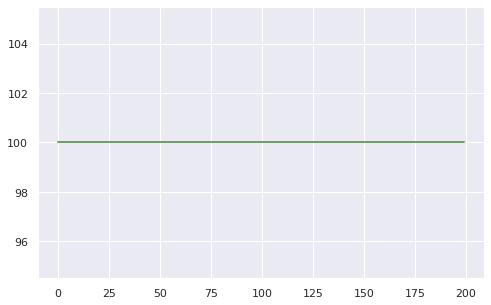

In [ ]:
plt.plot(range(len(history.history["loss"])), history.history["loss"], "r")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], "g")

In [ ]:
# let's check model's stability

for i in range(20):
  dnn = build_model()
  state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y, test_size=0.25, shuffle=True)
  dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
  history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                    validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                    epochs=50, verbose=0)
  # print(y_valid.mean(), y_valid.max(), y_valid.min())
  print(history.history["loss"][-1], history.history["val_loss"][-1])
  print(history.history["mape"][-1], history.history["val_mape"][-1])
  print("="*20)

11.49311351776123 11.491992950439453
100.0 100.0
0.3863116204738617 0.40817251801490784
13.503276824951172 14.57463264465332
0.4010600745677948 0.37271106243133545
13.46910572052002 11.553650856018066
11.616523742675781 11.122406959533691
100.0 100.0
0.40864038467407227 0.38749030232429504
14.2772216796875 13.176617622375488
0.3453330397605896 0.37873953580856323
13.135987281799316 13.387229919433594
0.351604700088501 0.39472496509552
12.852449417114258 13.538334846496582
0.3777424991130829 0.344168096780777
13.05241870880127 12.4341402053833
0.42168205976486206 0.4414938986301422
13.707355499267578 14.616435050964355
0.4115102291107178 0.3523953855037689
14.227762222290039 13.351481437683105
11.676026344299316 10.9442138671875
100.0 100.0
0.4270845949649811 0.32707417011260986
13.911001205444336 13.551163673400879
11.349478721618652 11.92213249206543
100.0 100.0
0.360623836517334 0.3471350371837616
12.819082260131836 12.889370918273926
0.3941792845726013 0.34857308864593506
14.0737876

In [ ]:
# we see that the model isn't stable yet, might be because of the data splits
# ths seems weird, but let's check what's happening

# Model Training Analysis

In [ ]:
# what we can do is that, when the error is huge, we could check what data split it was
# or we train it even further to see if it reduces later

for i in range(20):
  dnn = build_model()
  state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y, test_size=0.25, shuffle=True)
  dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
  history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                    validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                    epochs=50, verbose=0)
  # print(y_valid.mean(), y_valid.max(), y_valid.min())
  print(history.history["loss"][-1], history.history["val_loss"][-1])
  print(history.history["mape"][-1], history.history["val_mape"][-1])
  print("="*20)

  if history.history["mape"][-1] >= 20:
    # we want the variables to play with
    break

11.214582443237305 12.326104164123535
100.0 100.0


In [ ]:
y_train.isna().any()

A_PCT10     False
A_PCT25     False
A_MEDIAN    False
A_PCT75     False
A_PCT90     False
dtype: bool

In [ ]:
(y_train["A_MEDIAN"] == 0).any()

False

In [ ]:
(y_train["A_MEDIAN"] == 1).any()

True

In [ ]:
# might be that something is wrong with the model

dnn.weights

[<tf.Variable 'dense_106/kernel:0' shape=(10, 4) dtype=float32, numpy=
 array([[ 0.58868504,  0.17163044,  0.15090388,  0.36991155],
        [-0.47370547, -0.44667292, -0.42647815, -0.49100602],
        [ 0.42222333, -0.04181725, -0.24716362,  0.49520648],
        [-0.43957666, -0.6481674 ,  0.14927989, -0.16796657],
        [-0.03575504, -0.52620864, -0.6047895 ,  0.20607269],
        [ 0.16075486, -0.01092386,  0.03208083, -0.16632164],
        [ 0.5058466 ,  0.05827618,  0.63098407, -0.3826061 ],
        [ 0.27572578, -0.26193285,  0.6510254 , -0.35393047],
        [-0.19532192,  0.2955625 , -0.13233721, -0.28137267],
        [-0.10845441,  0.35392332, -0.59401315,  0.34302676]],
       dtype=float32)>,
 <tf.Variable 'dense_106/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_107/kernel:0' shape=(10, 4) dtype=float32, numpy=
 array([[-0.12897086, -0.03616506,  0.17877787,  0.23338473],
        [-0.6317423 , -0.33917373, -0.2284813

In [ ]:
# ah.. bias of all the layers are all 0s
# that might be an issue
# let's check reality

for i in range(20):
  dnn = build_model()
  state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y, test_size=0.25, shuffle=True)
  dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
  history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                    validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                    epochs=50, verbose=0)
  # print(y_valid.mean(), y_valid.max(), y_valid.min())
  print(history.history["loss"][-1], history.history["val_loss"][-1])
  print(history.history["mape"][-1], history.history["val_mape"][-1])
  print("="*20)

  if history.history["mape"][-1] <= 20:
    print(dnn.weights)
    break

0.4057193994522095 0.3975779116153717
13.403769493103027 13.831565856933594
[<tf.Variable 'dense_111/kernel:0' shape=(10, 4) dtype=float32, numpy=
array([[-0.01510964, -0.46568015, -0.3072839 ,  0.18259324],
       [-0.22993596, -0.0924352 ,  0.62663245, -0.37141633],
       [ 0.5280371 , -0.51913667,  0.5313389 , -0.24525867],
       [-0.46290034, -0.34345523, -0.66856503, -0.18507378],
       [-0.7316773 ,  0.24865456,  0.28505695, -0.17028996],
       [-0.2945654 ,  0.5731366 , -0.53908694, -0.6356932 ],
       [-0.12430798, -0.20942865, -0.3671331 ,  0.2817382 ],
       [ 0.18109217,  0.17007469, -0.5285654 , -0.5580488 ],
       [-0.19893502,  0.28973684, -0.24804422,  0.44650814],
       [-0.03689503, -0.6249157 ,  0.15226977, -0.41185105]],
      dtype=float32)>, <tf.Variable 'dense_111/bias:0' shape=(4,) dtype=float32, numpy=array([0.3235912 , 0.28065053, 0.23905344, 0.2357152 ], dtype=float32)>, <tf.Variable 'dense_112/kernel:0' shape=(10, 4) dtype=float32, numpy=
array([[ 0.0

In [ ]:
def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(4, kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform", activation="relu")(input_state)
  dense_naics = tf.keras.layers.Dense(4, kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform", activation="relu")(input_naics)
  dense_occ = tf.keras.layers.Dense(4, kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform", activation="relu")(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform", activation="relu")(concat)
  out = tf.keras.layers.Dense(1, kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform", activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn

In [ ]:
# we were right.. the problem is with the bias
# let's use some kernel and bias initializer
# and check again


for i in range(20):
  dnn = build_model()
  state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y, test_size=0.25, shuffle=True)
  dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
  history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                    validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                    epochs=50, verbose=0)
  # print(y_valid.mean(), y_valid.max(), y_valid.min())
  print(history.history["loss"][-1], history.history["val_loss"][-1])
  print(history.history["mape"][-1], history.history["val_mape"][-1])
  print(y_train["A_MEDIAN"].describe())
  print("="*20)

  if history.history["mape"][-1] >= 20:
    # we want the variables to play with
    break

11.396895408630371 11.779826164245605
100.0 99.99971008300781
count    1695.000000
mean        3.051268
std         1.444954
min         1.000000
25%         2.028986
50%         2.648829
75%         3.609253
max         9.514493
Name: A_MEDIAN, dtype: float64


In [ ]:
dnn.weights

[<tf.Variable 'dense_116/kernel:0' shape=(10, 4) dtype=float32, numpy=
 array([[-0.34903964, -0.24448794, -0.14757049,  0.4871664 ],
        [-0.12631452,  0.6064215 , -0.37399116, -0.04882562],
        [-0.21742213,  0.44860148,  0.53716063,  0.00708348],
        [ 0.5402398 , -0.60224426, -0.49885848,  0.60023534],
        [-0.5333909 , -0.16367856,  0.40522575, -0.3988915 ],
        [-0.26642302,  0.6336944 , -0.21680889,  0.4327979 ],
        [ 0.508325  ,  0.42350817, -0.54234296,  0.12234986],
        [-0.6163737 , -0.52727705, -0.12165546,  0.08436787],
        [-0.53914344,  0.39533913,  0.41558588, -0.6475504 ],
        [ 0.42374766,  0.04775941, -0.3453505 , -0.44280475]],
       dtype=float32)>,
 <tf.Variable 'dense_116/bias:0' shape=(4,) dtype=float32, numpy=array([-0.7196232 ,  0.6604664 ,  0.17456704, -0.45459673], dtype=float32)>,
 <tf.Variable 'dense_117/kernel:0' shape=(10, 4) dtype=float32, numpy=
 array([[ 0.11448228, -0.5523195 ,  0.20116371,  0.27838933],
        [

In [ ]:
# still we are facing the issue
# seems like somthing else is the culprit
# neither split data nor weights
# let's train the model further and see

# 200 more epochs
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                    validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                    epochs=50)

Epoch 1/50
53/53 [==============================] - 0s 4ms/step - loss: 11.3969 - mape: 100.0000 - poisson: 49.1806 - val_loss: 11.7798 - val_mape: 99.9997 - val_poisson: 50.2756
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 11.3969 - mape: 100.0000 - poisson: 49.1806 - val_loss: 11.7798 - val_mape: 99.9997 - val_poisson: 50.2756
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 11.3969 - mape: 100.0000 - poisson: 49.1806 - val_loss: 11.7798 - val_mape: 99.9997 - val_poisson: 50.2756
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 11.3969 - mape: 100.0000 - poisson: 49.1806 - val_loss: 11.7798 - val_mape: 99.9997 - val_poisson: 50.2756
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 11.3969 - mape: 100.0000 - poisson: 49.1806 - val_loss: 11.7798 - val_mape: 99.9997 - val_poisson: 50.2756
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 11.3969 - mape: 100.0000 - poisso

In [ ]:
# change optimizer

for i in range(20):
  dnn = build_model()
  state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y, test_size=0.25, shuffle=True)
  dnn.compile(optimizer="rmsprop", loss="mse", metrics=["mape", "poisson"])
  history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                    validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                    epochs=50, verbose=0)
  # print(y_valid.mean(), y_valid.max(), y_valid.min())
  print(history.history["loss"][-1], history.history["val_loss"][-1])
  print(history.history["mape"][-1], history.history["val_mape"][-1])
  print(y_train["A_MEDIAN"].describe())
  print("="*20)

  if history.history["mape"][-1] >= 20:
    # we want the variables to play with
    break

0.3970094323158264 0.420227587223053
14.179657936096191 14.079741477966309
count    1695.000000
mean        3.052086
std         1.412207
min         1.000000
25%         2.042921
50%         2.656633
75%         3.629877
max         9.514493
Name: A_MEDIAN, dtype: float64
11.325722694396973 11.993279457092285
100.0 100.0
count    1695.000000
mean        3.055815
std         1.410281
min         1.000000
25%         2.047380
50%         2.652174
75%         3.644649
max         9.123746
Name: A_MEDIAN, dtype: float64


In [ ]:
# arghhh... let's just initialize the network with a see to see if that works fine to maintain consistency

# set seeds
np.random.seed(17)
tf.random.set_seed(17)

def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(4, activation="relu")(input_state)
  dense_naics = tf.keras.layers.Dense(4, activation="relu")(input_naics)
  dense_occ = tf.keras.layers.Dense(4, activation="relu")(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, activation="relu")(concat)
  out = tf.keras.layers.Dense(1, activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn


dnn = build_model()
state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y,
                                                                                                              test_size=0.25, shuffle=True)
dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                  validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                  epochs=50)


Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 3.0634 - mape: 39.2681 - poisson: 0.0509 - val_loss: 1.1378 - val_mape: 31.4222 - val_poisson: -0.6123
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.8729 - mape: 28.1709 - poisson: -0.5176 - val_loss: 0.9345 - val_mape: 26.7998 - val_poisson: -0.6431
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.6541 - mape: 23.3169 - poisson: -0.5504 - val_loss: 0.6364 - val_mape: 20.4626 - val_poisson: -0.6852
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5404 - mape: 19.0720 - poisson: -0.5703 - val_loss: 0.5890 - val_mape: 17.2480 - val_poisson: -0.6950
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5139 - mape: 17.5919 - poisson: -0.5753 - val_loss: 0.5572 - val_mape: 16.6267 - val_poisson: -0.6991
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4983 - mape: 17.0265 - poisson: -0.5777 - val_l

In [ ]:
# try to change model architecture and improvize

# set seeds
np.random.seed(17)
tf.random.set_seed(17)

def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(8)(input_state)
  dense_naics = tf.keras.layers.Dense(8)(input_naics)
  dense_occ = tf.keras.layers.Dense(8)(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, activation="relu")(concat)
  out = tf.keras.layers.Dense(1, activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn


dnn = build_model()
state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y,
                                                                                                              test_size=0.25, shuffle=True)
dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 2],
                  validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 2]),
                  epochs=50)


Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 1.3822 - mape: 30.2317 - poisson: -0.4166 - val_loss: 0.8656 - val_mape: 25.3821 - val_poisson: -0.6534
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.6241 - mape: 21.7216 - poisson: -0.5569 - val_loss: 0.6609 - val_mape: 18.2621 - val_poisson: -0.6858
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5443 - mape: 18.0069 - poisson: -0.5712 - val_loss: 0.5984 - val_mape: 16.9353 - val_poisson: -0.6938
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5285 - mape: 17.1654 - poisson: -0.5739 - val_loss: 0.6052 - val_mape: 15.7016 - val_poisson: -0.6942
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5196 - mape: 16.7037 - poisson: -0.5756 - val_loss: 0.5832 - val_mape: 15.5996 - val_poisson: -0.6969
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5113 - mape: 16.9079 - poisson: -0.5762 - val_

# Experiments with other models

In [ ]:
# let's train similar models for other target variables
# todo: incorporate the order of target variables into models
# todo: try xgboost in comparison to random forest

# imports
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# for pct10

# set seeds
np.random.seed(17)
tf.random.set_seed(17)

def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(8)(input_state)
  dense_naics = tf.keras.layers.Dense(8)(input_naics)
  dense_occ = tf.keras.layers.Dense(8)(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, activation="relu")(concat)
  out = tf.keras.layers.Dense(1, activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn


dnn = build_model()
state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y,
                                                                                                              test_size=0.25, shuffle=True)
dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 0],
                  validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 0]),
                  epochs=50)


Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 0.3059 - mape: 21.1583 - poisson: 0.6023 - val_loss: 0.2536 - val_mape: 16.7968 - val_poisson: 0.5519
Epoch 2/50
53/53 [==============================] - 0s 4ms/step - loss: 0.2313 - mape: 17.5317 - poisson: 0.5827 - val_loss: 0.2167 - val_mape: 16.1932 - val_poisson: 0.5441
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2114 - mape: 16.4181 - poisson: 0.5779 - val_loss: 0.2023 - val_mape: 16.3962 - val_poisson: 0.5414
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2035 - mape: 16.1459 - poisson: 0.5762 - val_loss: 0.2084 - val_mape: 14.7522 - val_poisson: 0.5418
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1957 - mape: 15.6438 - poisson: 0.5744 - val_loss: 0.1878 - val_mape: 15.0927 - val_poisson: 0.5377
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1908 - mape: 15.7158 - poisson: 0.5737 - val_loss: 0.177

In [ ]:
# for pct25

# set seeds
np.random.seed(17)
tf.random.set_seed(17)

def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(8)(input_state)
  dense_naics = tf.keras.layers.Dense(8)(input_naics)
  dense_occ = tf.keras.layers.Dense(8)(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, activation="relu")(concat)
  out = tf.keras.layers.Dense(1, activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn


dnn = build_model()
state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y,
                                                                                                              test_size=0.25, shuffle=True)
dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 1],
                  validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 1]),
                  epochs=50)


Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 0.6260 - mape: 25.4283 - poisson: 0.2199 - val_loss: 0.4545 - val_mape: 20.1467 - val_poisson: 0.1016
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3650 - mape: 18.1744 - poisson: 0.1616 - val_loss: 0.3847 - val_mape: 16.9082 - val_poisson: 0.0885
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3385 - mape: 16.6746 - poisson: 0.1563 - val_loss: 0.3651 - val_mape: 16.4167 - val_poisson: 0.0852
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3297 - mape: 16.5245 - poisson: 0.1549 - val_loss: 0.3855 - val_mape: 15.2872 - val_poisson: 0.0875
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3206 - mape: 16.2026 - poisson: 0.1532 - val_loss: 0.3474 - val_mape: 15.3413 - val_poisson: 0.0816
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3104 - mape: 16.2375 - poisson: 0.1518 - val_loss: 0.329

In [ ]:
# for pct75

# set seeds
np.random.seed(17)
tf.random.set_seed(17)

def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(8)(input_state)
  dense_naics = tf.keras.layers.Dense(8)(input_naics)
  dense_occ = tf.keras.layers.Dense(8)(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, activation="relu")(concat)
  out = tf.keras.layers.Dense(1, activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn


dnn = build_model()
state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y,
                                                                                                              test_size=0.25, shuffle=True)
dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 3],
                  validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 3]),
                  epochs=50)


Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 1.4451 - mape: 32.4041 - poisson: -0.4262 - val_loss: 0.8397 - val_mape: 27.2996 - val_poisson: -0.7009
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5848 - mape: 22.4176 - poisson: -0.5786 - val_loss: 0.5564 - val_mape: 18.2802 - val_poisson: -0.7441
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4817 - mape: 17.7074 - poisson: -0.5969 - val_loss: 0.4950 - val_mape: 16.6837 - val_poisson: -0.7521
Epoch 4/50
53/53 [==============================] - 0s 4ms/step - loss: 0.4706 - mape: 16.6372 - poisson: -0.5993 - val_loss: 0.5132 - val_mape: 14.7870 - val_poisson: -0.7515
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4655 - mape: 16.3206 - poisson: -0.6004 - val_loss: 0.4853 - val_mape: 15.3018 - val_poisson: -0.7547
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4618 - mape: 16.5100 - poisson: -0.6003 - val_

In [ ]:
# for pct90

# set seeds
np.random.seed(17)
tf.random.set_seed(17)

def build_model():
  input_state = tf.keras.layers.Input(shape=df_state.shape[1])
  input_naics = tf.keras.layers.Input(shape=df_naics.shape[1])
  input_occ = tf.keras.layers.Input(shape=df_occ.shape[1])

  dense_state = tf.keras.layers.Dense(8)(input_state)
  dense_naics = tf.keras.layers.Dense(8)(input_naics)
  dense_occ = tf.keras.layers.Dense(8)(input_occ)
  
  
  concat = tf.keras.layers.Concatenate(axis=1)([dense_state, dense_naics, dense_occ])
  
  out = tf.keras.layers.Dense(16, activation="relu")(concat)
  out = tf.keras.layers.Dense(1, activation="relu")(out)

  dnn = tf.keras.models.Model(inputs=[input_state, input_naics, input_occ], outputs=out)
  return dnn


dnn = build_model()
state_train, state_valid, naics_train, naics_valid, occ_train, occ_valid, y_train, y_valid = train_test_split(df_occ, df_naics, df_state, df_y,
                                                                                                              test_size=0.25, shuffle=True)
dnn.compile(optimizer="adam", loss="mse", metrics=["mape", "poisson"])
history = dnn.fit(x=[state_train.values, naics_train.values, occ_train.values], y=y_train.values[:, 4],
                  validation_data=([state_valid.values, naics_valid.values, occ_valid.values], y_valid.values[:, 4]),
                  epochs=50)


Epoch 1/50
53/53 [==============================] - 1s 7ms/step - loss: 1.6066 - mape: 33.8745 - poisson: -0.5566 - val_loss: 0.8730 - val_mape: 27.4415 - val_poisson: -0.8382
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.5870 - mape: 23.1414 - poisson: -0.7300 - val_loss: 0.4995 - val_mape: 18.9632 - val_poisson: -0.8888
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4443 - mape: 17.4645 - poisson: -0.7533 - val_loss: 0.4409 - val_mape: 16.1251 - val_poisson: -0.8982
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4303 - mape: 16.0001 - poisson: -0.7564 - val_loss: 0.4446 - val_mape: 14.4334 - val_poisson: -0.8990
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 0.4248 - mape: 15.5589 - poisson: -0.7574 - val_loss: 0.4305 - val_mape: 14.9455 - val_poisson: -0.9005
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4219 - mape: 15.6919 - poisson: -0.7575 - val_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.8543942204087691, 0.7422456484474592), (0.8608118613222947, 0.7437115207313683), (0.853937280230028, 0.7480554901288512), (0.8661571405736831, 0.7111740958717404)]
[(0.1121945963812128, 0.14155527157062017), (0.11101717378461279, 0.15227361161326117), (0.11204764223059778, 0.14206803881498725), (0.11053328587950523, 0.1468322161766543)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


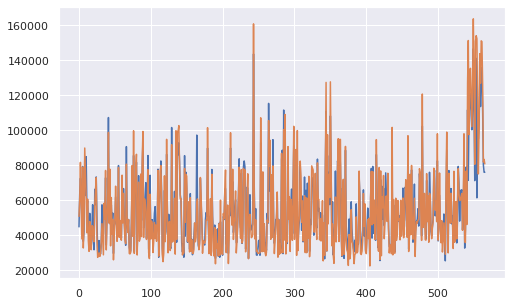

In [ ]:
# similar performance
# we see that the model's performance decrease as we move towards PCT75 and PCT90 as the variance increases quite a lot in those features

df_x = df_dummies.copy()
df_y = df_train_filled[[col for col in df_train_filled.columns if "A_" in col]]

rf_reg = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=50,
    max_leaf_nodes=25,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg.fit(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    
    train_score = rf_reg.score(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    test_score = rf_reg.score(df_x.iloc[test].values, df_y.iloc[test]["A_MEDIAN"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_MEDIAN"].values, y_pred)
    
    y_pred = rf_reg.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_MEDIAN"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
  y_pred = rf_reg.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_MEDIAN"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[06:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[(0.9659080227482051, 0.2795530050732904), (0.9731100316179514, -0.33459320855315955), (0.9743861291046526, -0.6500069475399886), (0.9781671596903881, -0.4167786302349834)]
[(0.021451824611152893, 0.2836734990832072), (0.019424338037700887, 0.3557920598056257), (0.019290958687069957, 0.38661960393578726), (0.017078188993776368, 0.3933025917531218)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


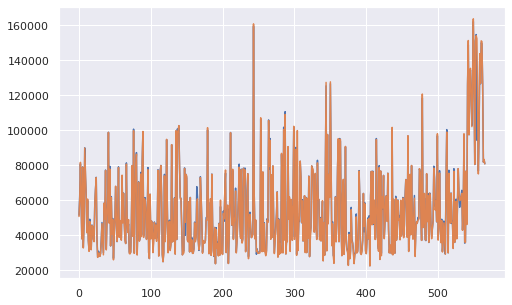

In [ ]:
# using xgboost

# import
from xgboost import XGBRegressor

rf_reg = XGBRegressor(
    n_estimators=100,
    max_depth=50,
    max_leaf_nodes=25,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg.fit(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    
    train_score = rf_reg.score(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    test_score = rf_reg.score(df_x.iloc[test].values, df_y.iloc[test]["A_MEDIAN"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_MEDIAN"].values, y_pred)
    
    y_pred = rf_reg.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_MEDIAN"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
  y_pred = rf_reg.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_MEDIAN"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.9036662946787694, 0.7385463032060757), (0.9095420526024317, 0.7503439372013345), (0.9061370872359599, 0.747038735193283), (0.9155784174023802, 0.7080271087096324)]
[(0.07868487613887824, 0.14056989839176262), (0.07871743599218632, 0.14748820097086912), (0.07731610685314079, 0.14347854913341948), (0.07678056445469059, 0.14503743664351973)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


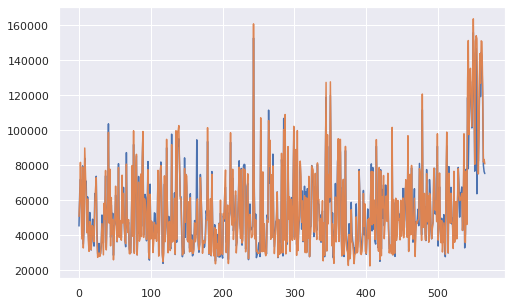

In [ ]:
# seems like xgb is overfitting
# let's move ahead with gbm as our final model
# it has the power of decision tress as well as gradient descent

# trying to optimize gbm to meet dnn level mape loss

rf_reg = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=25,
    max_leaf_nodes=50,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg.fit(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    
    train_score = rf_reg.score(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    test_score = rf_reg.score(df_x.iloc[test].values, df_y.iloc[test]["A_MEDIAN"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_MEDIAN"].values, y_pred)
    
    y_pred = rf_reg.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_MEDIAN"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
  y_pred = rf_reg.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_MEDIAN"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

# Incorporate order of target variables into models

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.8958607920703526, 0.6724798217775442), (0.895305346504448, 0.6479857925545462), (0.9009839409796101, 0.6552110248692398), (0.896130767750926, 0.6706801877532741)]
[(0.06724194194977676, 0.12760890980833994), (0.06575342160444543, 0.12813161097001935), (0.06869395581105073, 0.11830193046486326), (0.06668676816940071, 0.12700485693357408)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


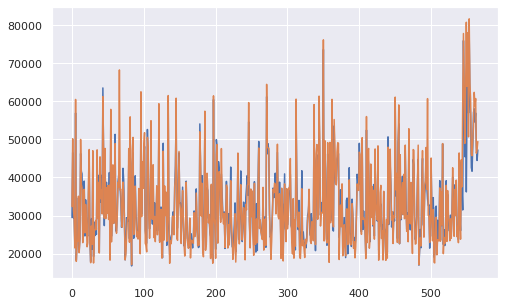

In [ ]:
# gbm seems unable to beat dnn
# we might opt with an ensemble model finally
# but before that, we need to incorporate the sequence of targets into the dnn
# we can also do the same for gbm and it would be easy
# so let's do it for gbm first

df_x = df_dummies.copy()
df_y = df_train_filled[[col for col in df_train_filled.columns if "A_" in col]]

rf_reg_10 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=25,
    max_leaf_nodes=50,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_PCT10"]):
    rf_reg_10.fit(df_x.iloc[train].values, df_y.iloc[train]["A_PCT10"].values)
    
    train_score = rf_reg_10.score(df_x.iloc[train].values, df_y.iloc[train]["A_PCT10"].values)
    test_score = rf_reg_10.score(df_x.iloc[test].values, df_y.iloc[test]["A_PCT10"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg_10.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_PCT10"].values, y_pred)
    
    y_pred = rf_reg_10.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_PCT10"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_PCT10"]):
  y_pred = rf_reg_10.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_PCT10"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

In [ ]:
# add prediction of rf_reg_10 as a feature for PCT25

df_x["rf_reg_10"] = rf_reg_10.predict(df_x.values)
df_x["rf_reg_10"]

0       29479.200842
1       49469.103797
2       56280.636932
3       40154.401713
4       46510.647194
            ...     
2291    47209.882253
2292    41205.394503
2293    45079.305060
2294    43315.408091
2295    37467.836683
Name: rf_reg_10, Length: 2261, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.9823553091762678, 0.7185205831033588), (0.982908418600906, 0.7539778762507291), (0.9785237272791093, 0.7562210559567282), (0.98021413055896, 0.72238259990574)]
[(0.042106963721496485, 0.11153084528873783), (0.04166368667015278, 0.10100712248510686), (0.04363485694479645, 0.1161175810186348), (0.042324251916400824, 0.10839163221484385)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


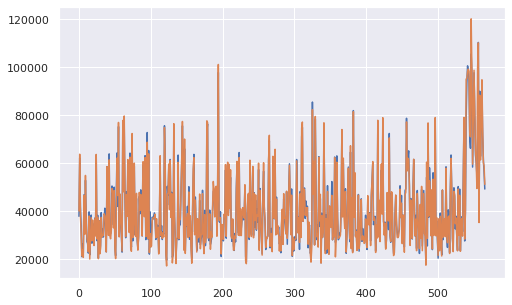

In [ ]:
# for pct25


rf_reg_25 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=25,
    max_leaf_nodes=50,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_PCT25"]):
    rf_reg_25.fit(df_x.iloc[train].values, df_y.iloc[train]["A_PCT25"].values)
    
    train_score = rf_reg_25.score(df_x.iloc[train].values, df_y.iloc[train]["A_PCT25"].values)
    test_score = rf_reg_25.score(df_x.iloc[test].values, df_y.iloc[test]["A_PCT25"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg_25.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_PCT25"].values, y_pred)
    
    y_pred = rf_reg_25.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_PCT25"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_PCT25"]):
  y_pred = rf_reg_25.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_PCT25"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

In [ ]:
# check if rf_reg_25 was able to learn the order between targets

df_x["rf_reg_25"] = rf_reg_25.predict(df_x.values)
((df_x["rf_reg_25"] > df_x["rf_reg_10"]).sum()) / len(df_x["rf_reg_25"])

0.9823087129588678

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.9922625921283976, 0.847284981597821), (0.99247982727067, 0.8606743131257458), (0.9923439785655775, 0.8186380465643041), (0.992548026838363, 0.8578661810118104)]
[(0.03469779294109122, 0.09941728015252843), (0.03497423809327102, 0.08674914458249416), (0.034506900926608096, 0.09922998843300614), (0.03420787848464245, 0.091677390977236)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


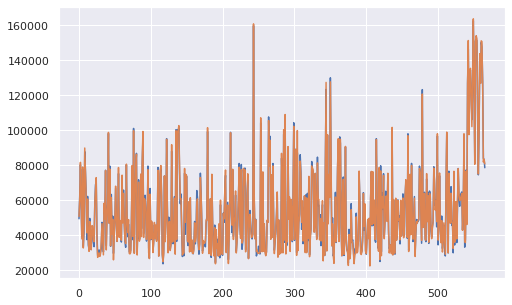

In [ ]:
# it was able to learn the pattern 98% of the time
# todo: is there a way to force this order in any model?

# for median


rf_reg_median = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=25,
    max_leaf_nodes=50,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg_median.fit(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    
    train_score = rf_reg_median.score(df_x.iloc[train].values, df_y.iloc[train]["A_MEDIAN"].values)
    test_score = rf_reg_median.score(df_x.iloc[test].values, df_y.iloc[test]["A_MEDIAN"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg_median.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_MEDIAN"].values, y_pred)
    
    y_pred = rf_reg_median.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_MEDIAN"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
  y_pred = rf_reg_median.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_MEDIAN"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

In [ ]:
# check if rf_reg_median was able to learn the order between targets

df_x["rf_reg_median"] = rf_reg_median.predict(df_x.values)
((df_x["rf_reg_median"] > df_x["rf_reg_25"]).sum()) / len(df_x["rf_reg_median"])

0.9933657673595754

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.9942890385307788, 0.9194576847325915), (0.9942056235445399, 0.9402590856667955), (0.9944776950284995, 0.9333226992245621), (0.996804528911451, 0.7986995356833424)]
[(0.03335827944134455, 0.08379380842240906), (0.03384689540858613, 0.07190671256204596), (0.03324735438998729, 0.07547274828012458), (0.025817311780905825, 0.12398497020646382)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


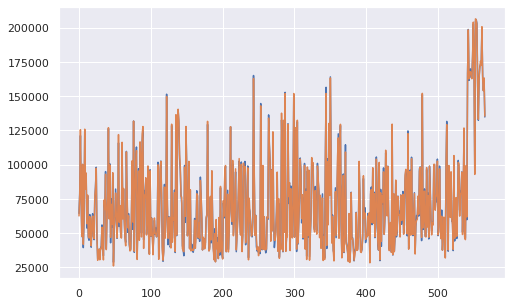

In [ ]:
# great.. pattern learnt 99% of times

# for 75


rf_reg_75 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=25,
    max_leaf_nodes=50,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg_75.fit(df_x.iloc[train].values, df_y.iloc[train]["A_PCT75"].values)
    
    train_score = rf_reg_75.score(df_x.iloc[train].values, df_y.iloc[train]["A_PCT75"].values)
    test_score = rf_reg_75.score(df_x.iloc[test].values, df_y.iloc[test]["A_PCT75"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg_75.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_PCT75"].values, y_pred)
    
    y_pred = rf_reg_75.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_PCT75"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
  y_pred = rf_reg_75.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_PCT75"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

In [ ]:
# check if rf_reg_75 was able to learn the order between targets

df_x["rf_reg_75"] = rf_reg_75.predict(df_x.values)
((df_x["rf_reg_75"] > df_x["rf_reg_median"]).sum()) / len(df_x["rf_reg_75"])

0.9986731534719151

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


[(0.9948648498671518, 0.9375895111182784), (0.9942098207366802, 0.9351936477551169), (0.9944223095563037, 0.9477443778910387), (0.9976025204856485, 0.7905405043589724)]
[(0.03430937032525227, 0.08163992333738736), (0.03567567273468926, 0.07823162607188318), (0.035694880981781904, 0.07306129585133143), (0.023618928752838466, 0.1419909756293981)]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,


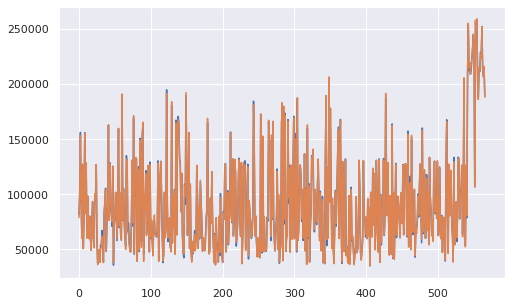

In [ ]:
# encode target - predict the difference or percent difference instead of raw values?

# for 90


rf_reg_90 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=25,
    max_leaf_nodes=50,
    random_state=0,
    verbose=0,
    warm_start=False,
)
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)


poisson_scores = []
mape_scores = []

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
    rf_reg_90.fit(df_x.iloc[train].values, df_y.iloc[train]["A_PCT90"].values)
    
    train_score = rf_reg_90.score(df_x.iloc[train].values, df_y.iloc[train]["A_PCT90"].values)
    test_score = rf_reg_90.score(df_x.iloc[test].values, df_y.iloc[test]["A_PCT90"].values)
    poisson_scores.append((train_score, test_score))


    y_pred = rf_reg_90.predict(df_x.iloc[train].values)
    train_score = mean_absolute_percentage_error(df_y.iloc[train]["A_PCT90"].values, y_pred)
    
    y_pred = rf_reg_90.predict(df_x.iloc[test].values)
    test_score = mean_absolute_percentage_error(df_y.iloc[test]["A_PCT90"].values, y_pred)
    mape_scores.append((train_score, test_score))


print(poisson_scores)
print(mape_scores)

for (train, test) in cv.split(df_x, df_y["A_MEDIAN"]):
  y_pred = rf_reg_90.predict(df_x.iloc[test].values)
  y_true = df_y.iloc[test]["A_PCT90"].values
  break

plt.plot(range(len(y_pred)), y_pred, label="pred")
plt.plot(range(len(y_true)), y_true, label="true")

In [ ]:
# check if rf_reg_90 was able to learn the order between targets

rf_reg_90_arr = rf_reg_90.predict(df_x.values)
(rf_reg_90_arr > df_x["rf_reg_75"]).sum() / len(rf_reg_90_arr)

0.9973463069438302

In [ ]:
# let's calculate the final score for gbm as defined in the task

# df_x is populated.. we will need to remove columns on need for every model
df_x

,PRIM_STATE_AL,PRIM_STATE_AR,PRIM_STATE_AZ,PRIM_STATE_CA,PRIM_STATE_CO,PRIM_STATE_CT,PRIM_STATE_DC,PRIM_STATE_DE,PRIM_STATE_FL,PRIM_STATE_GA,...,OCC_TITLE_Top Executives,OCC_TITLE_Tour and Travel Guides,OCC_TITLE_Transportation and Material Moving Occupations,"OCC_TITLE_Vehicle and Mobile Equipment Mechanics, Installers, and Repairers",OCC_TITLE_Water Transportation Workers,OCC_TITLE_Woodworkers,rf_reg_10,rf_reg_25,rf_reg_median,rf_reg_75
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,29479.200842,37974.996980,49477.395674,64379.512299
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,49469.103797,65141.888241,84774.309370,109127.198819
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56280.636932,66140.260648,86561.530407,125139.694685
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40154.401713,48464.043339,62229.599041,78964.016912
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46510.647194,62289.713405,83033.800993,105864.932487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,47209.882253,64856.087499,103821.118624,153195.575526
2292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,41205.394503,71268.104468,103970.842903,163834.256393
2293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,45079.305060,71416.728667,122450.853260,176102.890951
2294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,43315.408091,60494.355001,92149.048361,153286.042816


In [ ]:
def normalized_absolute_error(true, pred):
    return abs(pred - true) / true


pred_10 = rf_reg_10.predict(df_x.iloc[:, :-4].values)
pred_25 = rf_reg_25.predict(df_x.iloc[:, :-3].values)
pred_median = rf_reg_median.predict(df_x.iloc[:, :-2].values)
pred_75 = rf_reg_75.predict(df_x.iloc[:, :-1].values)
pred_90 = rf_reg_90.predict(df_x.values)


# incorporate the order of predected precentiles and return 0 if the order is not followed
# filter the rows that satisfy
filter = (pred_10 < pred_25) & (pred_25 < pred_median) & (pred_median < pred_75) & (pred_75 < pred_90)


# weighted error calcluation
l10 = 0.1*normalized_absolute_error(df_y["A_PCT10"][filter].values, pred_10[filter])
l25 = 0.2*normalized_absolute_error(df_y["A_PCT25"][filter].values, pred_25[filter])
l50 = 0.4*normalized_absolute_error(df_y["A_MEDIAN"][filter].values, pred_median[filter])
l75 = 0.2*normalized_absolute_error(df_y["A_PCT75"][filter].values, pred_75[filter])
l90 = 0.1*normalized_absolute_error(df_y["A_PCT90"][filter].values, pred_90[filter])


np.mean(l10+l25+l50+l75+l90)

0.052889741136558525

In [ ]:
# the loss with gbm is 0.052889741136558525
# what will be the loss with dnn?
# and what about ensemble?

In [ ]:
# i guess we shouldn't move ahead with the dnn and ensemble as the dnn is still unstable
# setting seeds might help, but it doesn't hide the fact that the model doesn't train when the weights are initialized a certain way
# have to get a deeper understanding and identify the source of this issue before we consider the dnn for this task
# so let's wind up the research for now and move ahead with gbm
# if time permits, we will try looking deeper into what's wrong with the weights initialization of dnn (should it be vanishing gradients from the start? or something else)